# APRENDIZADO DE MÁQUINA PARA ANÁLISE DE TRÁFEGO DE REDE E DETECÇÃO DE INTRUSÃO

## Inicialização

In [28]:
import pandas as pd
import numpy as np
import sklearn
import sweetviz as sv
from supervised.automl import AutoML # mljar-supervised
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from ipywidgets import IntProgress
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('KDDTrain+.txt',header=None)
df_test = pd.read_csv('KDDTest+.txt', header=None)

Criando array de rótulos das colunas:

In [4]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_train.columns = columns
df_test.columns = columns

## Pré-processamento

Criação da variável alvo:

In [5]:
is_attack = df_train.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = df_test.attack.map(lambda a: 0 if a == 'normal' else 1)

Transformação das variáveis categóricas:

In [6]:
label_encoder = LabelEncoder()

In [7]:
cat_var = df_train['protocol_type']
num_var = label_encoder.fit_transform(cat_var)
df_train['protocol_type'] = num_var

cat_var = df_train['service']
num_var = label_encoder.fit_transform(cat_var)
df_train['service'] = num_var

cat_var = df_train['flag']
num_var = label_encoder.fit_transform(cat_var)
df_train['flag'] = num_var

cat_var = df_train['attack']
num_var = label_encoder.fit_transform(cat_var)
df_train['attack'] = num_var

df_train.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack  level  
0      11     20  
1      11     15  
2       9     19  
3      11     21  
4      11     21  

[5 rows x 43 columns]

In [8]:
cat_var = df_test['protocol_type']
num_var = label_encoder.fit_transform(cat_var)
df_test['protocol_type'] = num_var

cat_var = df_test['service']
num_var = label_encoder.fit_transform(cat_var)
df_test['service'] = num_var

cat_var = df_test['flag']
num_var = label_encoder.fit_transform(cat_var)
df_test['flag'] = num_var

cat_var = df_test['attack']
num_var = label_encoder.fit_transform(cat_var)
df_test['attack'] = num_var

df_test.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       45     1          0          0     0   
1         0              1       45     1          0          0     0   
2         2              1       19     9      12983          0     0   
3         0              0       13     9         20          0     0   
4         1              1       55     2          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

   attack  level  
0      14     21  
1      14     21  
2      16     21  
3      24     15  
4      11     11  

[5 rows x 43 columns]

Normalização dos valores:

In [9]:
scaler = StandardScaler()

In [10]:
x = df_train.values
norm_df_train = scaler.fit_transform(x)
df_train = pd.DataFrame(norm_df_train)
df_train.columns = columns
df_train.head()

duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0 -0.110249      -0.124706 -0.686785  0.751111  -0.007679  -0.004919   
1 -0.110249       2.219312  0.781428  0.751111  -0.007737  -0.004919   
2 -0.110249      -0.124706  1.087305 -0.736235  -0.007762  -0.004919   
3 -0.110249      -0.124706 -0.442083  0.751111  -0.007723  -0.002891   
4 -0.110249      -0.124706 -0.442083  0.751111  -0.007728  -0.004814   

       land  wrong_fragment    urgent       hot  ...  dst_host_same_srv_rate  \
0 -0.014089       -0.089486 -0.007736 -0.095076  ...               -0.782367   
1 -0.014089       -0.089486 -0.007736 -0.095076  ...               -1.161030   
2 -0.014089       -0.089486 -0.007736 -0.095076  ...               -0.938287   
3 -0.014089       -0.089486 -0.007736 -0.095076  ...                1.066401   
4 -0.014089       -0.089486 -0.007736 -0.095076  ...                1.066401   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.280282                     0.069972   
1                2.736852                     2.367737   
2               -0.174417                    -0.480197   
3               -0.439078                    -0.383108   
4               -0.439078                    -0.480197   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                    -0.289103             -0.639532   
1                    -0.289103             -0.639532   
2                    -0.289103              1.608759   
3                     0.066252             -0.572083   
4                    -0.289103             -0.639532   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                 -0.624871             -0.224532                 -0.376387   
1                 -0.624871             -0.387635                 -0.376387   
2                  1.618955             -0.387635                 -0.376387   
3                 -0.602433             -0.387635                 -0.345084   
4                 -0.624871             -0.387635                 -0.376387   

     attack     level  
0  0.142074  0.216426  
1  0.142074 -1.965556  
2 -0.616630 -0.219970  
3  0.142074  0.652823  
4  0.142074  0.652823  

[5 rows x 43 columns]

In [11]:
x = df_test.values
norm_df_test = scaler.fit_transform(x)
df_test = pd.DataFrame(norm_df_test)
df_test.columns = columns
df_test.head()

duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0 -0.155534      -0.176303  0.933964 -1.829954  -0.021988  -0.096896   
1 -0.155534      -0.176303  0.933964 -1.829954  -0.021988  -0.096896   
2 -0.154113      -0.176303 -0.882254  0.662256   0.005473  -0.096896   
3 -0.155534      -2.695050 -1.301382  0.662256  -0.021946  -0.096896   
4 -0.154823      -0.176303  1.632509 -1.518428  -0.021988  -0.096189   

       land  wrong_fragment    urgent       hot  ...  dst_host_same_srv_rate  \
0 -0.017624       -0.059104 -0.019459 -0.113521  ...               -1.305370   
1 -0.017624       -0.059104 -0.019459 -0.113521  ...               -1.397181   
2 -0.017624       -0.059104 -0.019459 -0.113521  ...                0.002934   
3 -0.017624       -0.059104 -0.019459 -0.113521  ...                0.898090   
4 -0.017624       -0.059104 -0.019459 -0.113521  ...               -0.685647   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.138370                    -0.431856   
1               -0.138370                    -0.431856   
2               -0.228985                     1.559906   
3               -0.410217                     2.833328   
4                0.360018                    -0.333901   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                    -0.229980             -0.358118   
1                    -0.229980             -0.358118   
2                     0.004234             -0.358118   
3                     3.049016             -0.358118   
4                     0.004234             -0.358118   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                  -0.35275              1.979791                  1.929116   
1                  -0.35275              1.979791                  1.929116   
2                  -0.35275             -0.602719                 -0.565483   
3                  -0.35275             -0.602719                 -0.565483   
4                  -0.35275              1.540764                  1.205682   

     attack     level  
0 -0.243297  0.698325  
1 -0.243297  0.698325  
2  0.045138  0.698325  
3  1.198881 -0.706739  
4 -0.675951 -1.643449  

[5 rows x 43 columns]

In [12]:
df_train['attack_flag'] = is_attack
df_test['attack_flag'] = test_attack

In [13]:
df_train.head()

duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0 -0.110249      -0.124706 -0.686785  0.751111  -0.007679  -0.004919   
1 -0.110249       2.219312  0.781428  0.751111  -0.007737  -0.004919   
2 -0.110249      -0.124706  1.087305 -0.736235  -0.007762  -0.004919   
3 -0.110249      -0.124706 -0.442083  0.751111  -0.007723  -0.002891   
4 -0.110249      -0.124706 -0.442083  0.751111  -0.007728  -0.004814   

       land  wrong_fragment    urgent       hot  ...  dst_host_diff_srv_rate  \
0 -0.014089       -0.089486 -0.007736 -0.095076  ...               -0.280282   
1 -0.014089       -0.089486 -0.007736 -0.095076  ...                2.736852   
2 -0.014089       -0.089486 -0.007736 -0.095076  ...               -0.174417   
3 -0.014089       -0.089486 -0.007736 -0.095076  ...               -0.439078   
4 -0.014089       -0.089486 -0.007736 -0.095076  ...               -0.439078   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                     0.069972                    -0.289103   
1                     2.367737                    -0.289103   
2                    -0.480197                    -0.289103   
3                    -0.383108                     0.066252   
4                    -0.480197                    -0.289103   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0             -0.639532                 -0.624871             -0.224532   
1             -0.639532                 -0.624871             -0.387635   
2              1.608759                  1.618955             -0.387635   
3             -0.572083                 -0.602433             -0.387635   
4             -0.639532                 -0.624871             -0.387635   

   dst_host_srv_rerror_rate    attack     level  attack_flag  
0                 -0.376387  0.142074  0.216426            0  
1                 -0.376387  0.142074 -1.965556            0  
2                 -0.376387 -0.616630 -0.219970            1  
3                 -0.345084  0.142074  0.652823            0  
4                 -0.376387  0.142074  0.652823            0  

[5 rows x 44 columns]

In [14]:
df_test.head()

duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0 -0.155534      -0.176303  0.933964 -1.829954  -0.021988  -0.096896   
1 -0.155534      -0.176303  0.933964 -1.829954  -0.021988  -0.096896   
2 -0.154113      -0.176303 -0.882254  0.662256   0.005473  -0.096896   
3 -0.155534      -2.695050 -1.301382  0.662256  -0.021946  -0.096896   
4 -0.154823      -0.176303  1.632509 -1.518428  -0.021988  -0.096189   

       land  wrong_fragment    urgent       hot  ...  dst_host_diff_srv_rate  \
0 -0.017624       -0.059104 -0.019459 -0.113521  ...               -0.138370   
1 -0.017624       -0.059104 -0.019459 -0.113521  ...               -0.138370   
2 -0.017624       -0.059104 -0.019459 -0.113521  ...               -0.228985   
3 -0.017624       -0.059104 -0.019459 -0.113521  ...               -0.410217   
4 -0.017624       -0.059104 -0.019459 -0.113521  ...                0.360018   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                    -0.431856                    -0.229980   
1                    -0.431856                    -0.229980   
2                     1.559906                     0.004234   
3                     2.833328                     3.049016   
4                    -0.333901                     0.004234   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0             -0.358118                  -0.35275              1.979791   
1             -0.358118                  -0.35275              1.979791   
2             -0.358118                  -0.35275             -0.602719   
3             -0.358118                  -0.35275             -0.602719   
4             -0.358118                  -0.35275              1.540764   

   dst_host_srv_rerror_rate    attack     level  attack_flag  
0                  1.929116 -0.243297  0.698325            1  
1                  1.929116 -0.243297  0.698325            1  
2                 -0.565483  0.045138  0.698325            0  
3                 -0.565483  1.198881 -0.706739            1  
4                  1.205682 -0.675951 -1.643449            1  

[5 rows x 44 columns]

In [33]:
cor_ananlysis = sv.analyze(df_train,target_feat='attack_flag')

                                             |          | [  0%]   00:00 -> (? left)


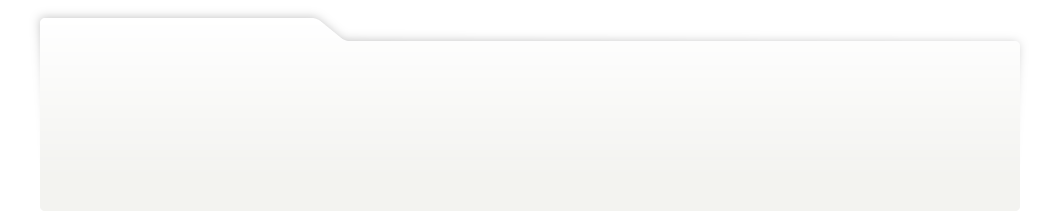
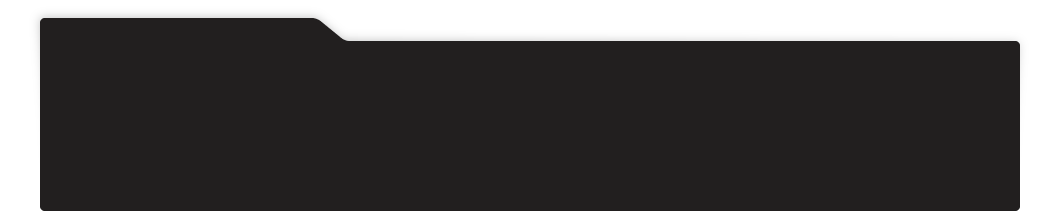
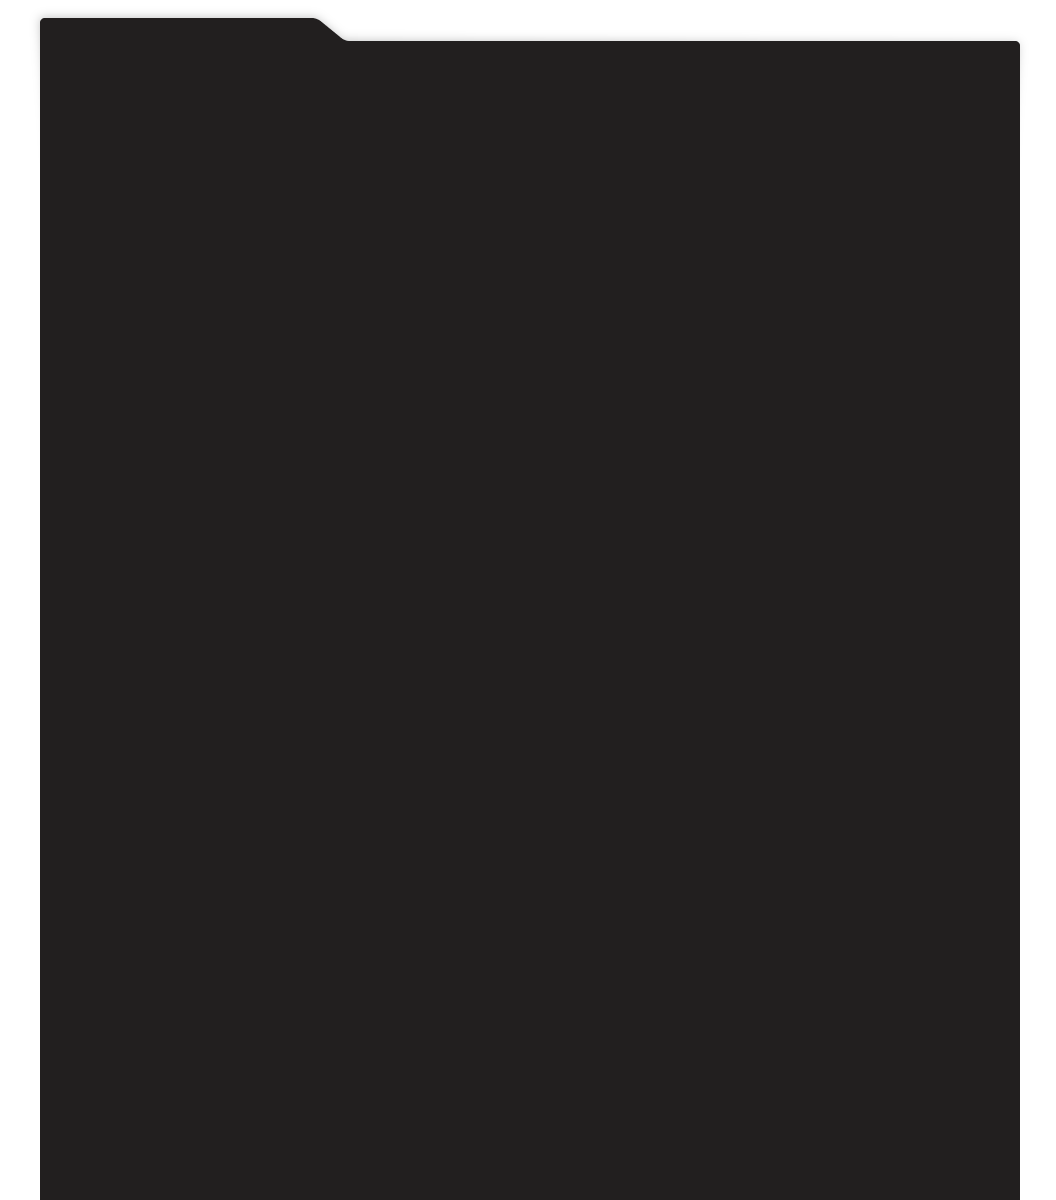
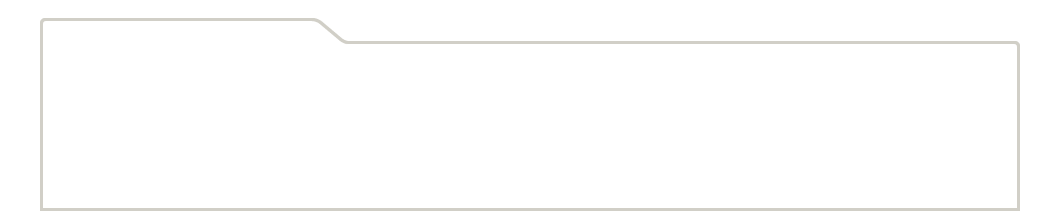
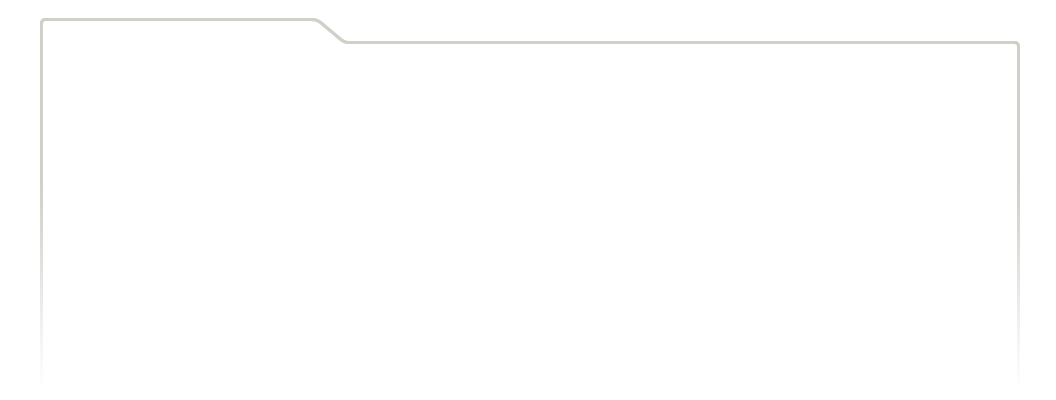
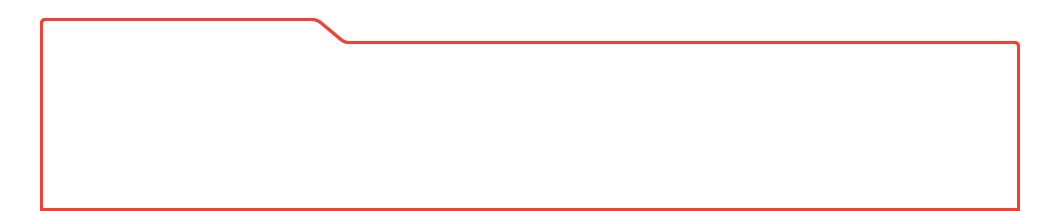
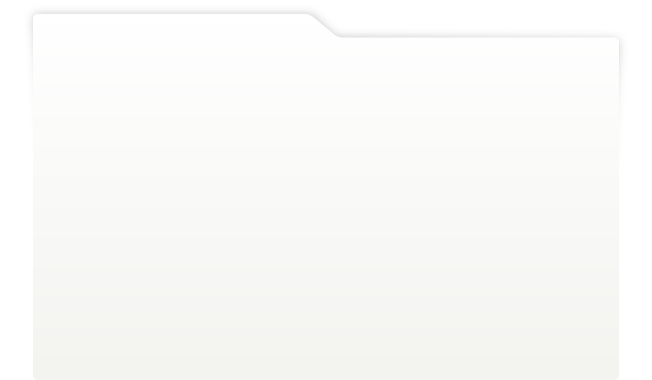
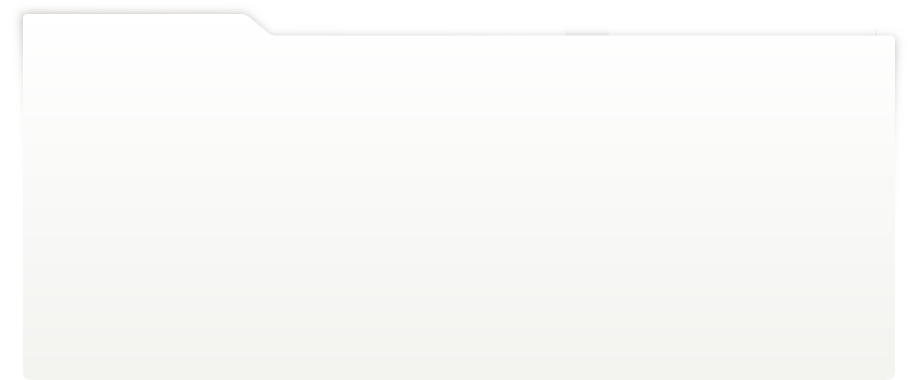
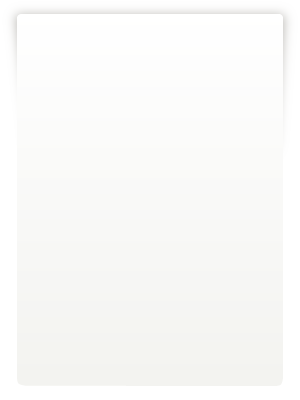
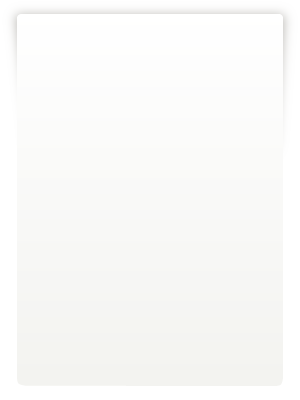
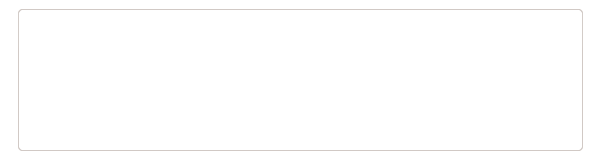
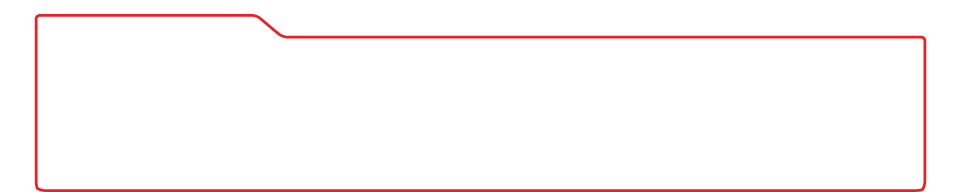
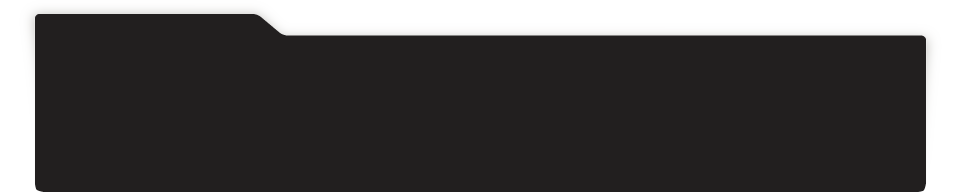
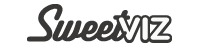
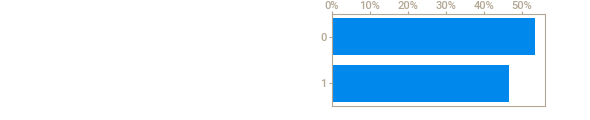
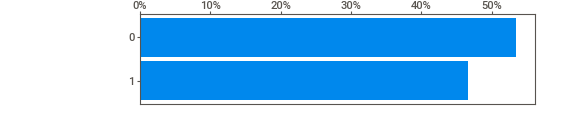
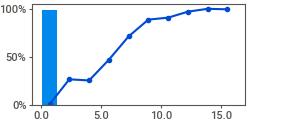
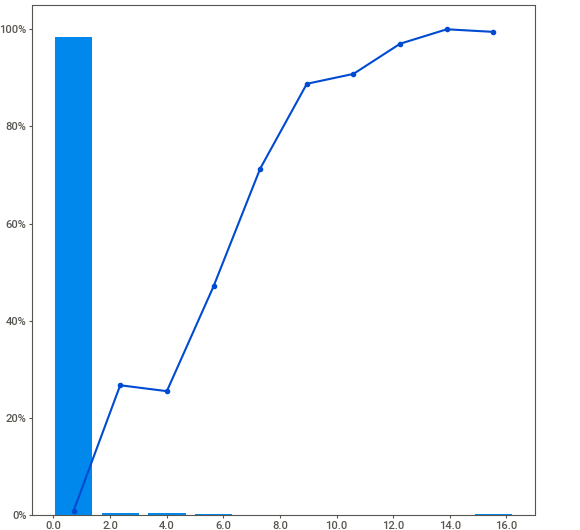
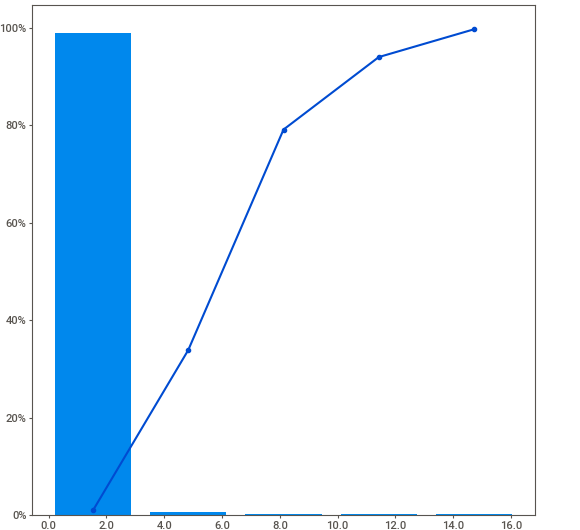
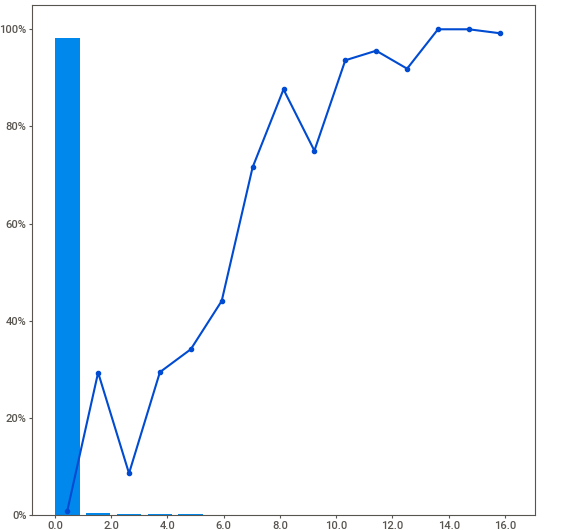
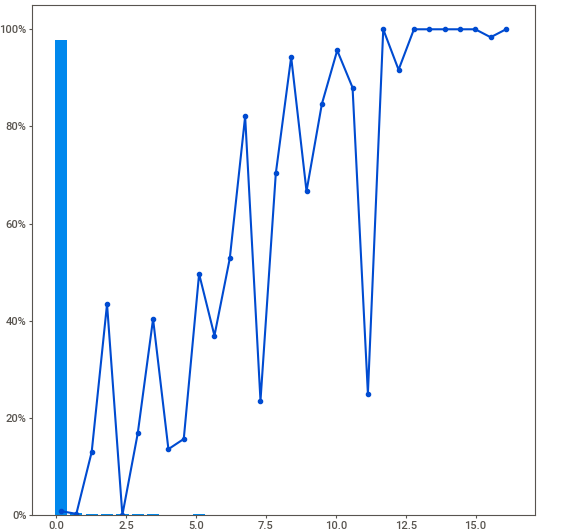
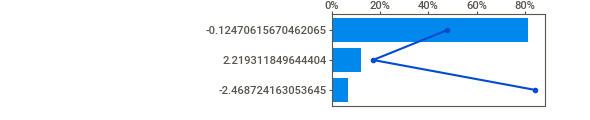
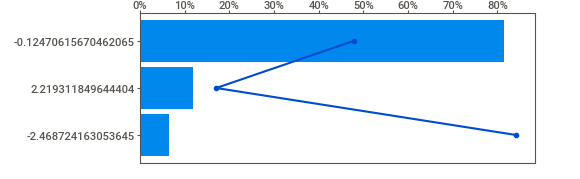
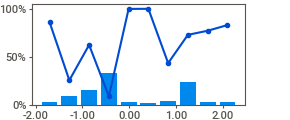
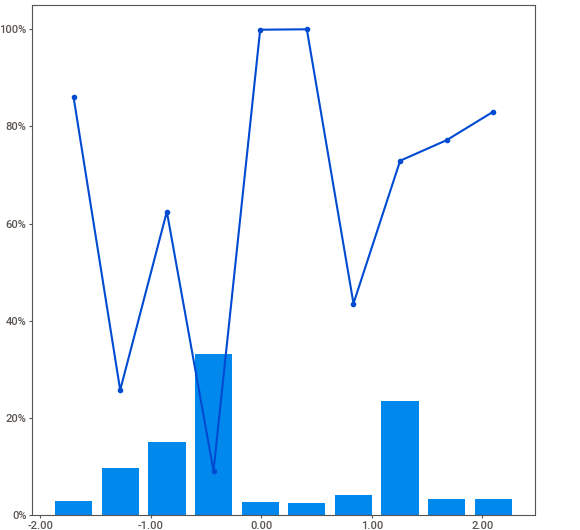
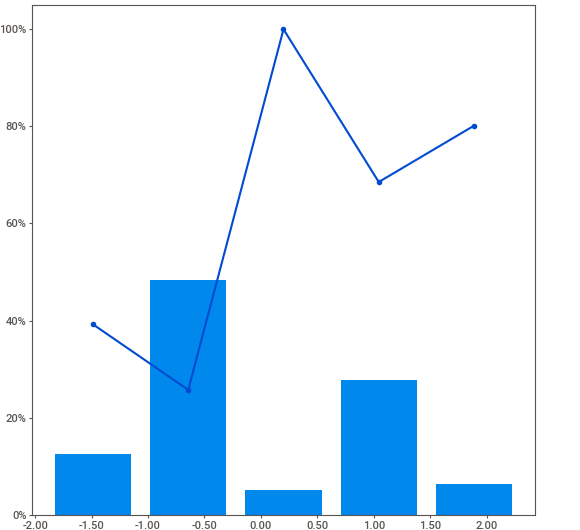
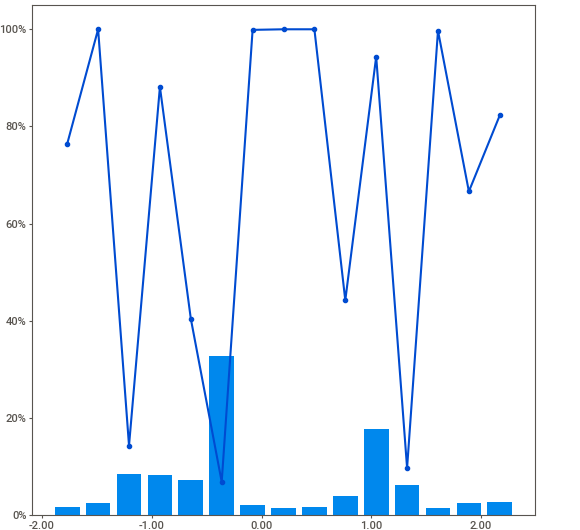
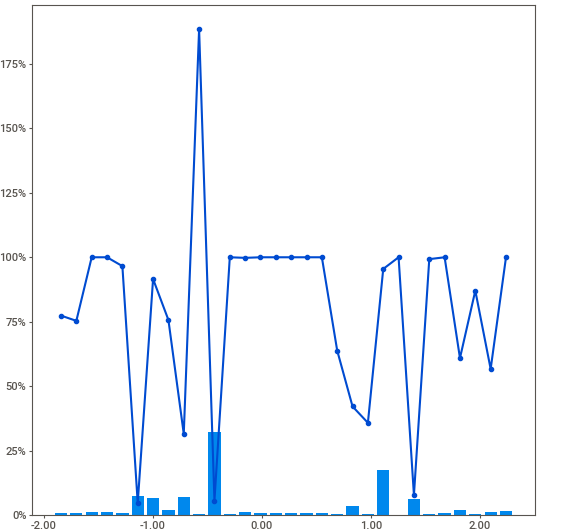
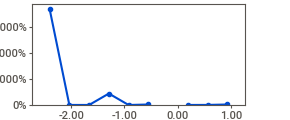
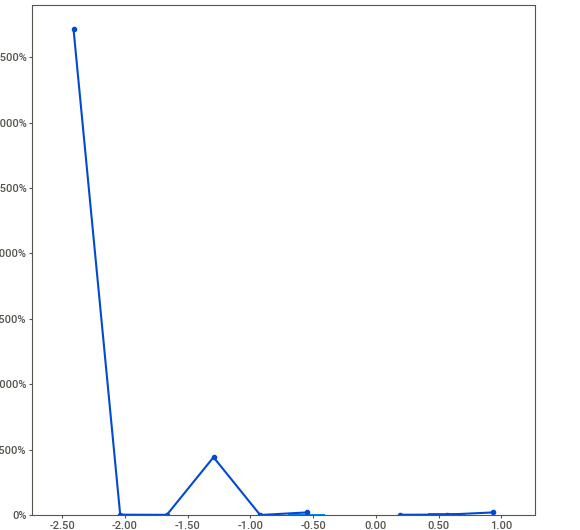
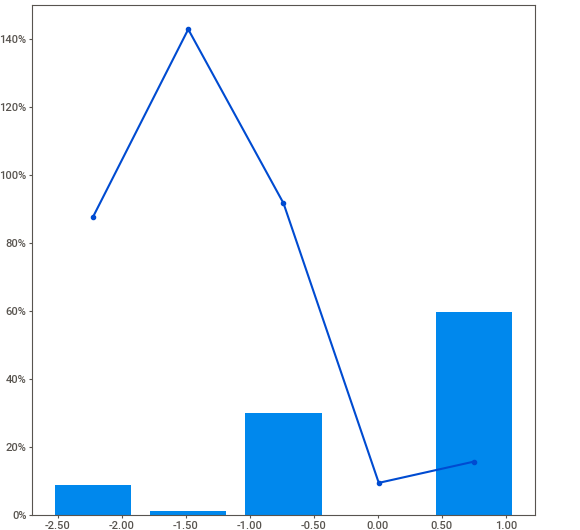
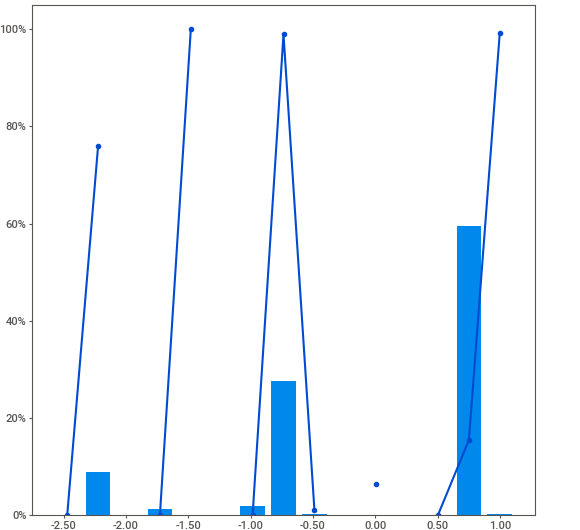
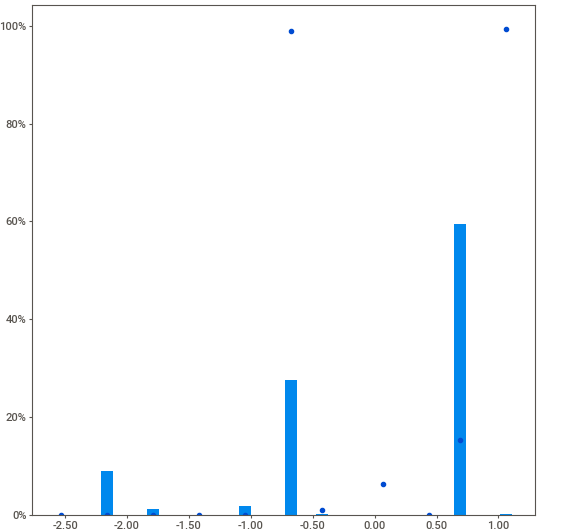
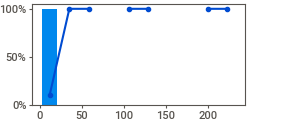
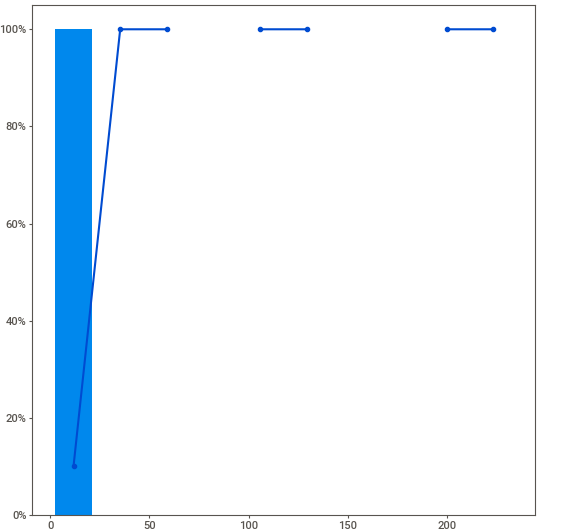
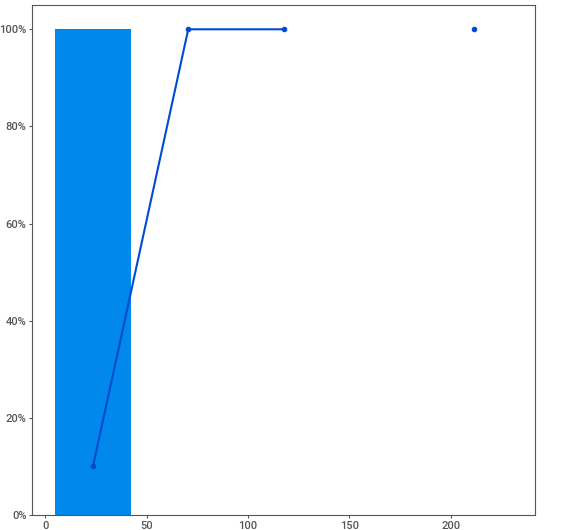
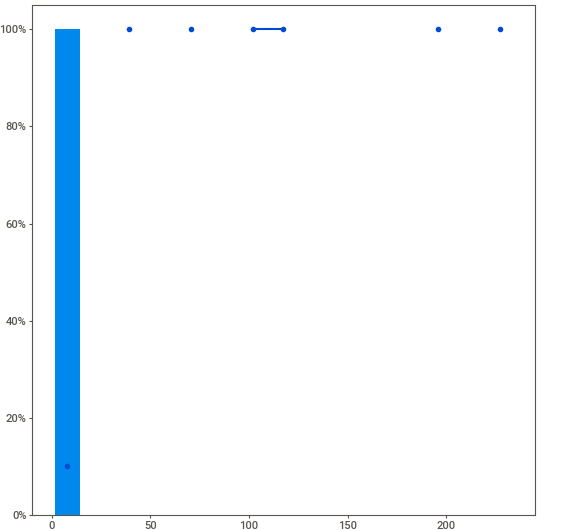
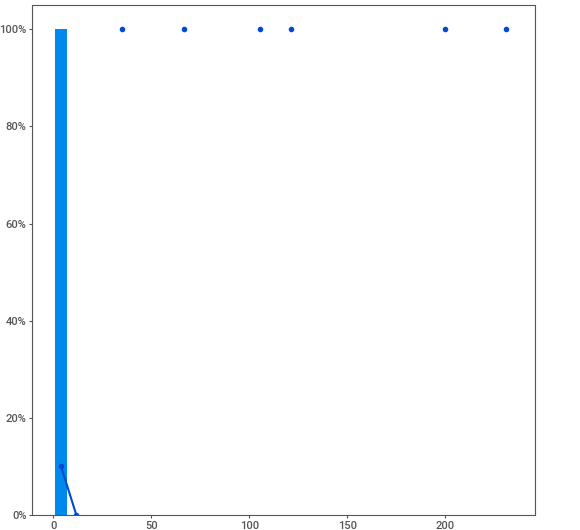
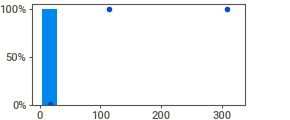
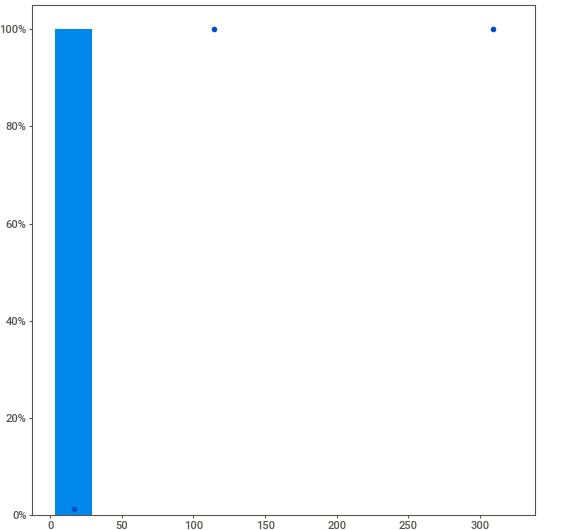
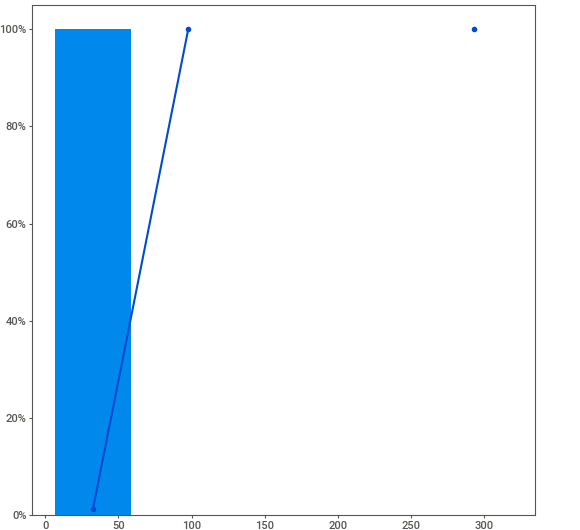
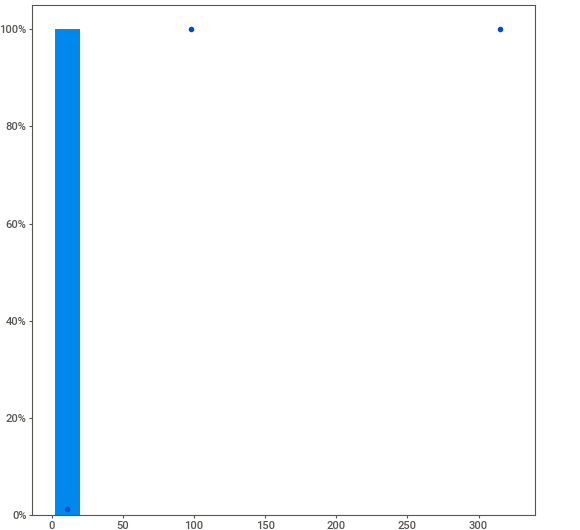
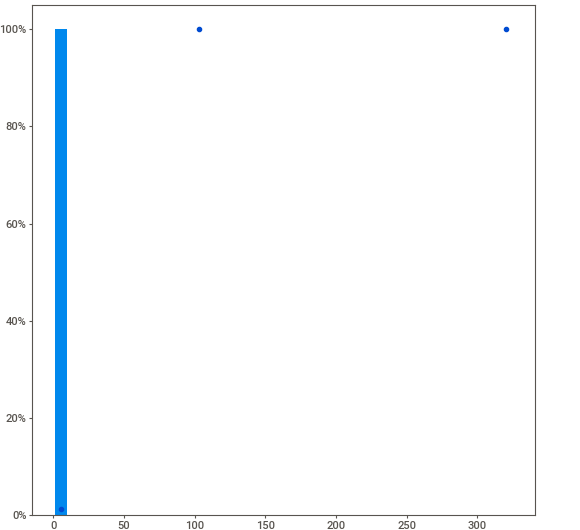
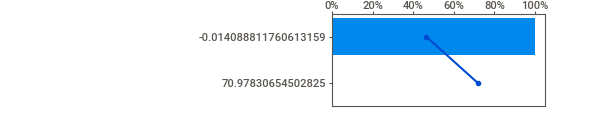
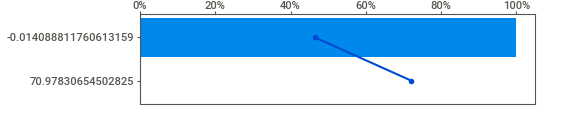
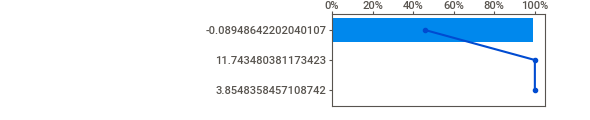
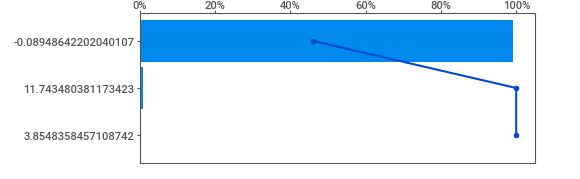
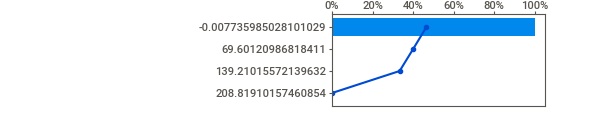
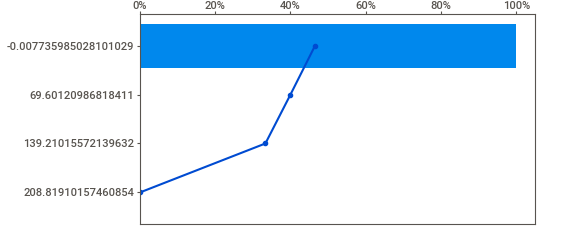
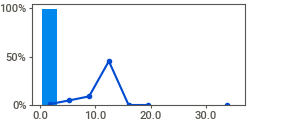
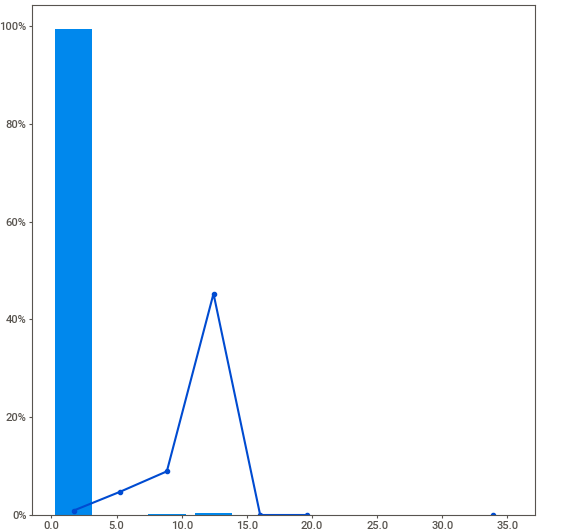
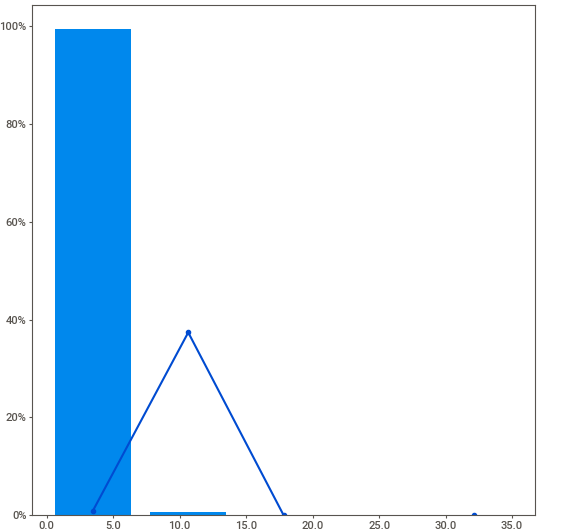
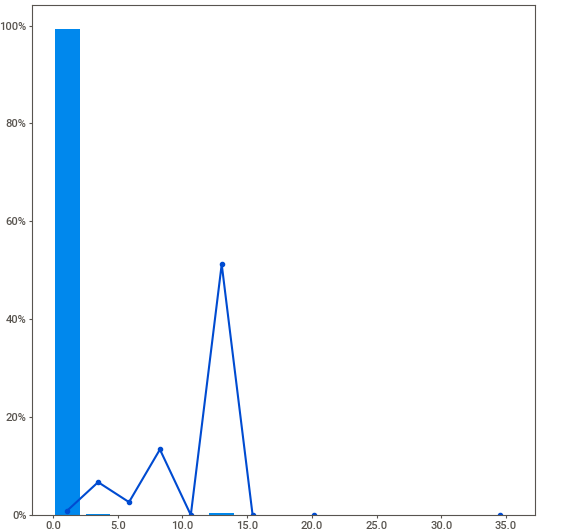
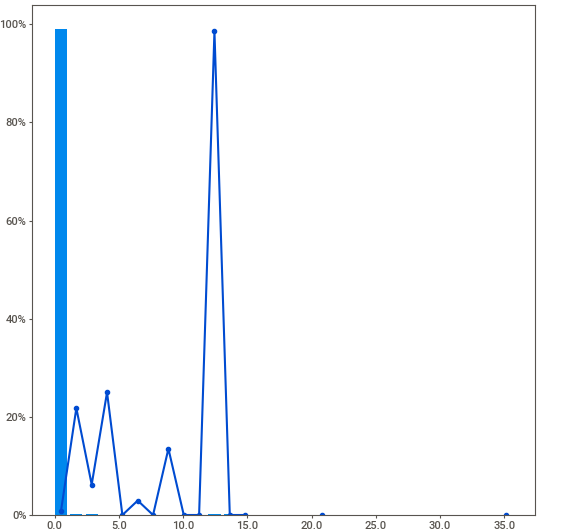
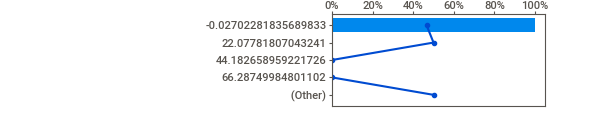
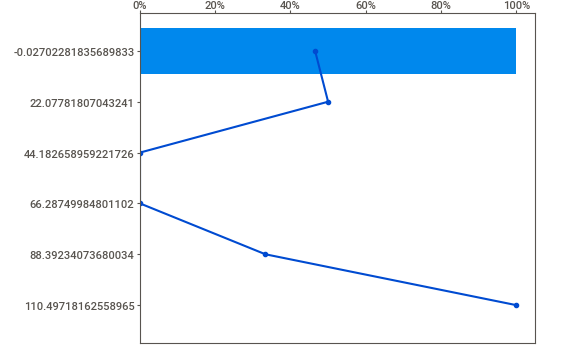
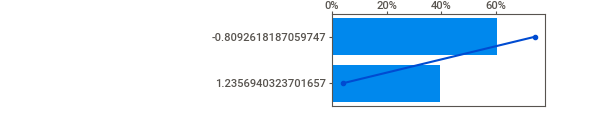
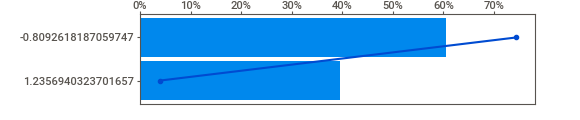
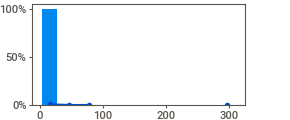
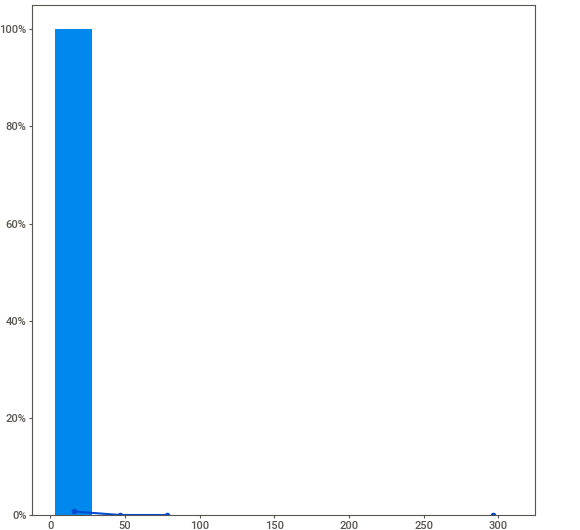
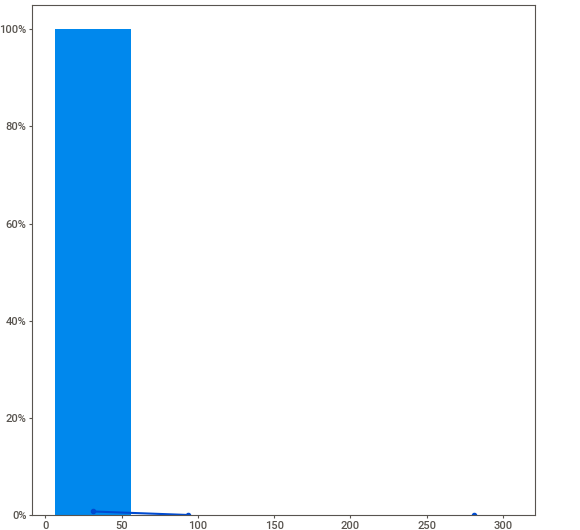
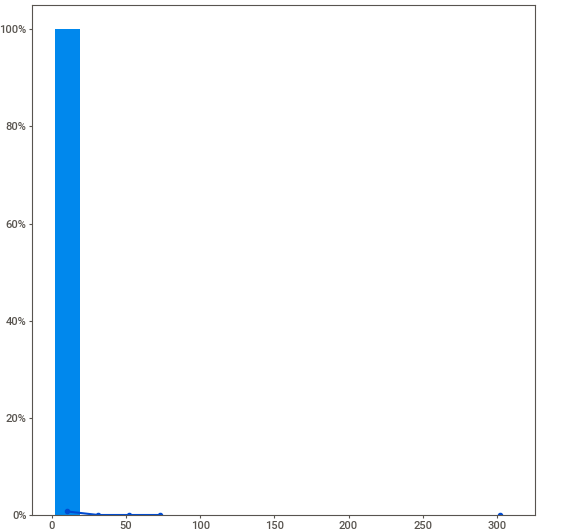
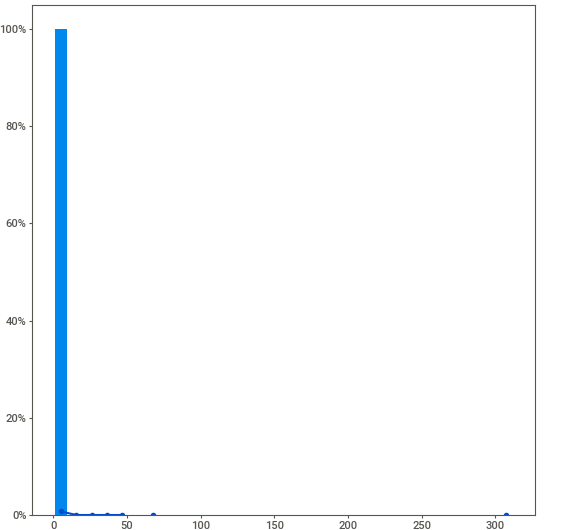
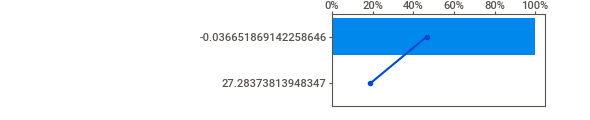
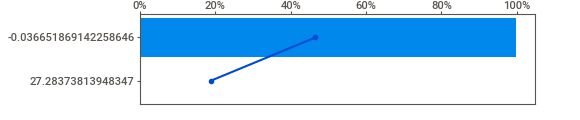
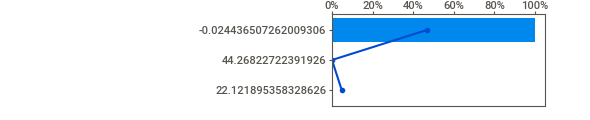
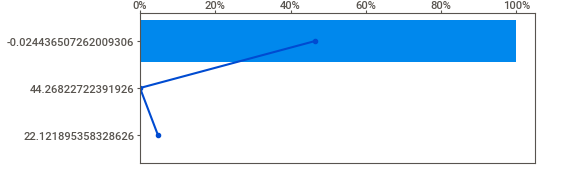
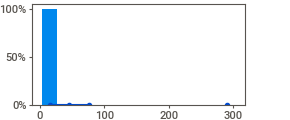
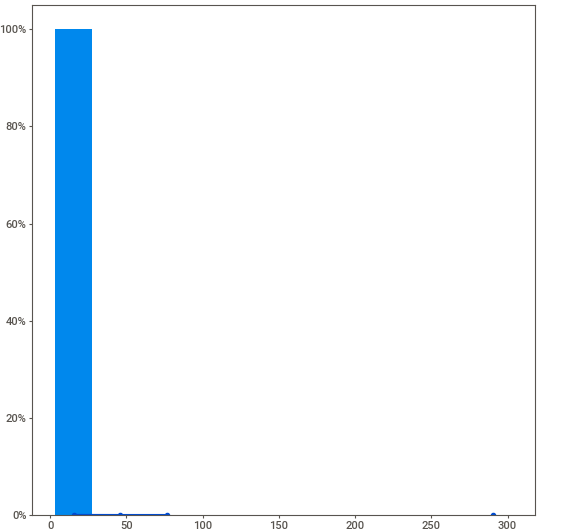
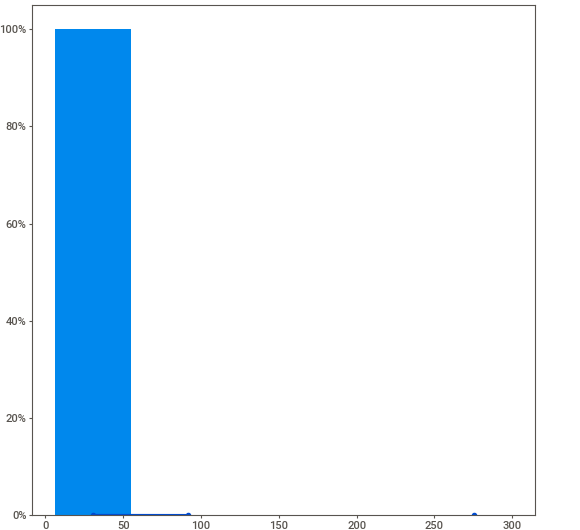
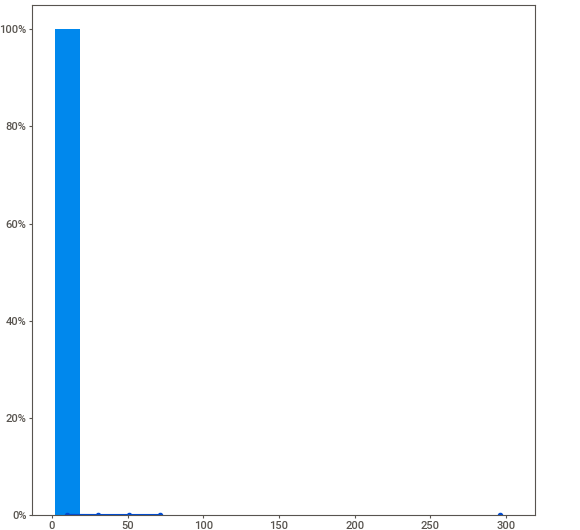
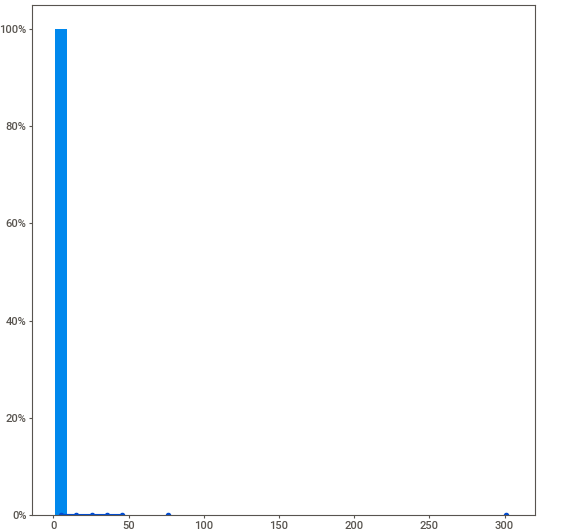
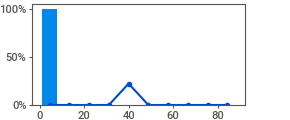
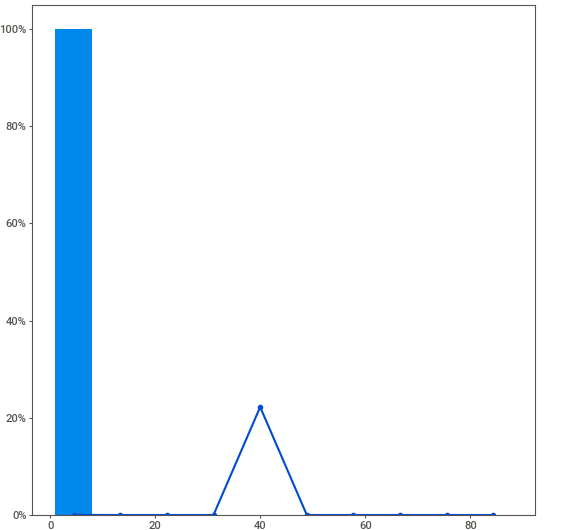
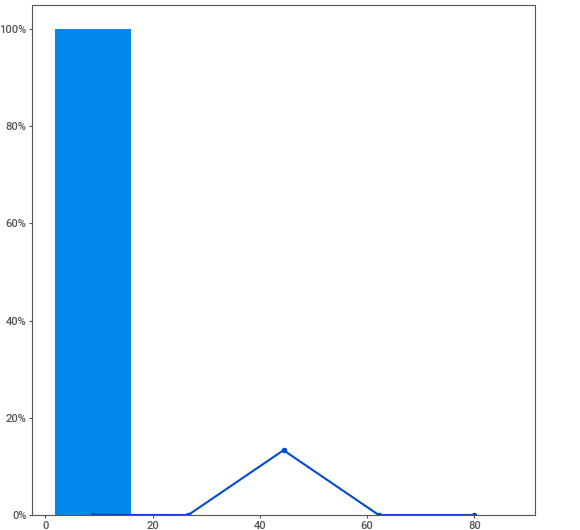
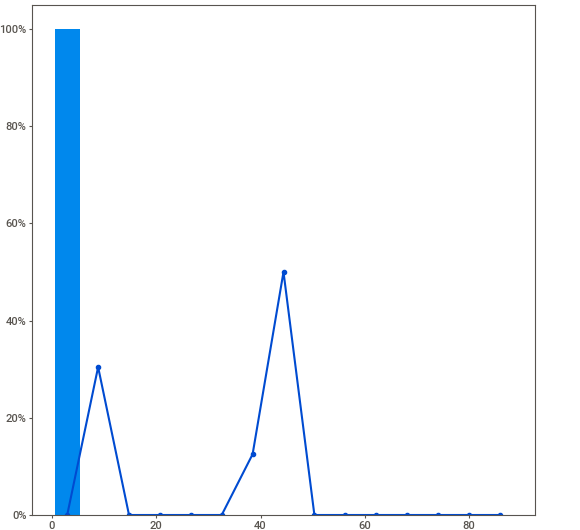
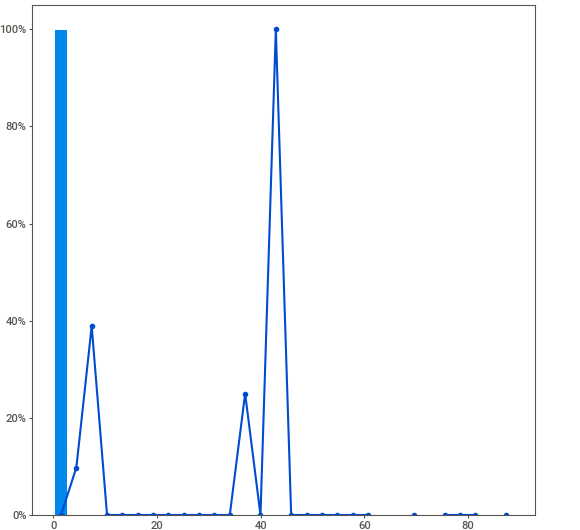
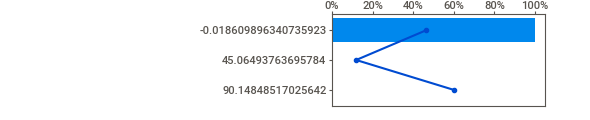
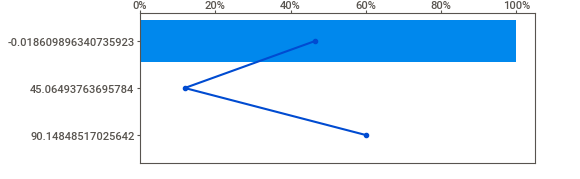
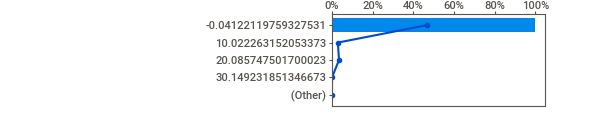
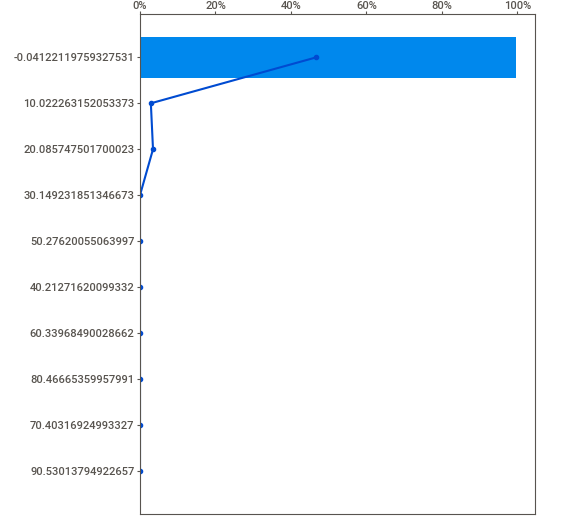
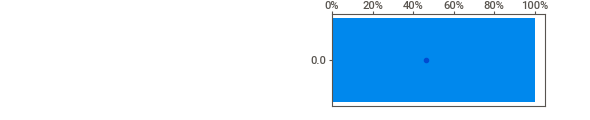
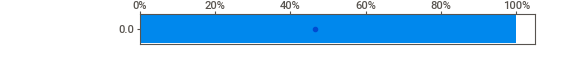
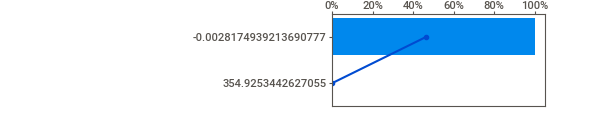
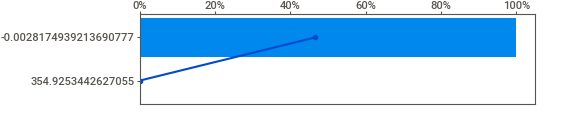
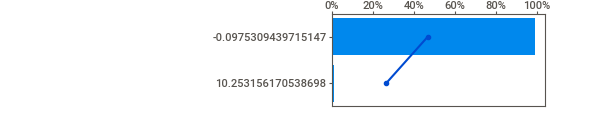
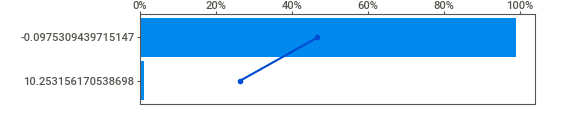
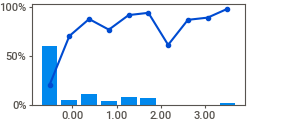
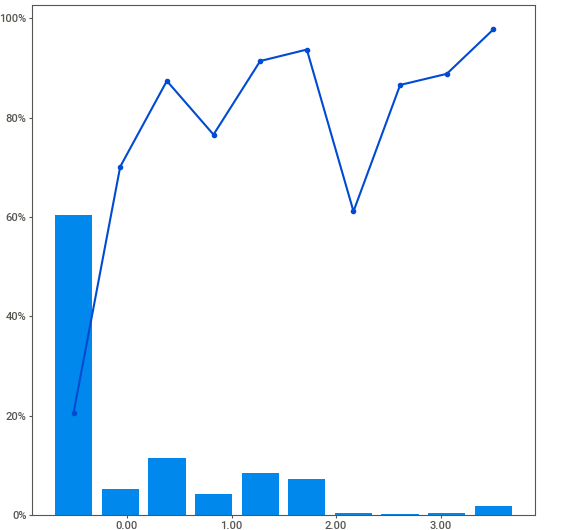
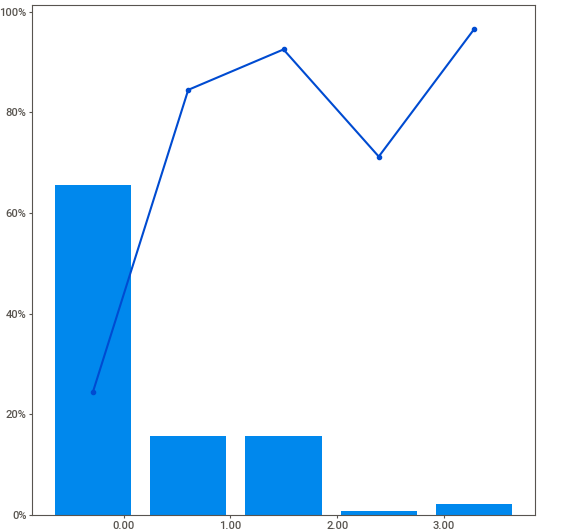
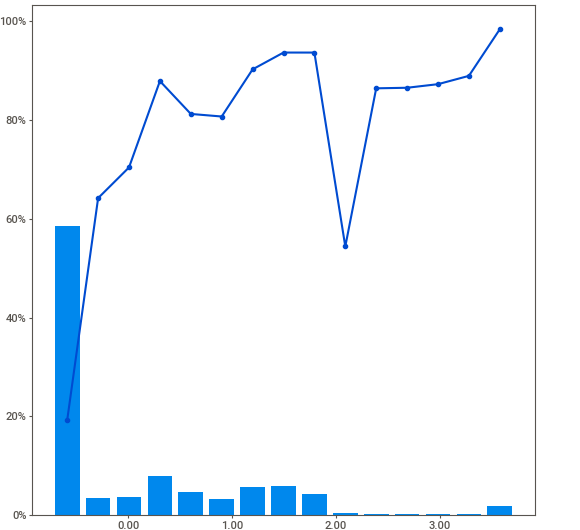
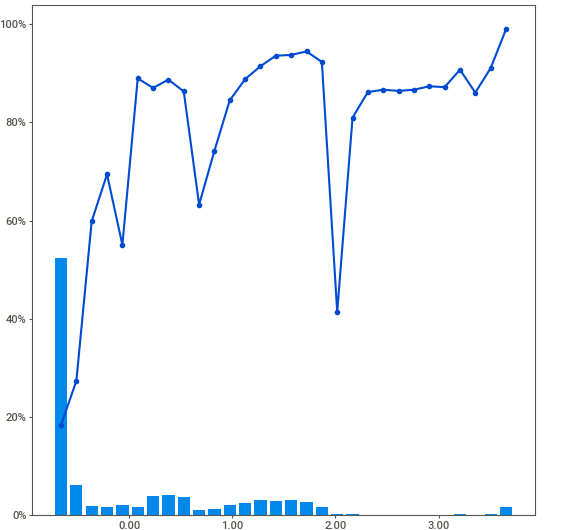
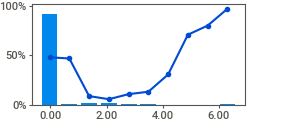
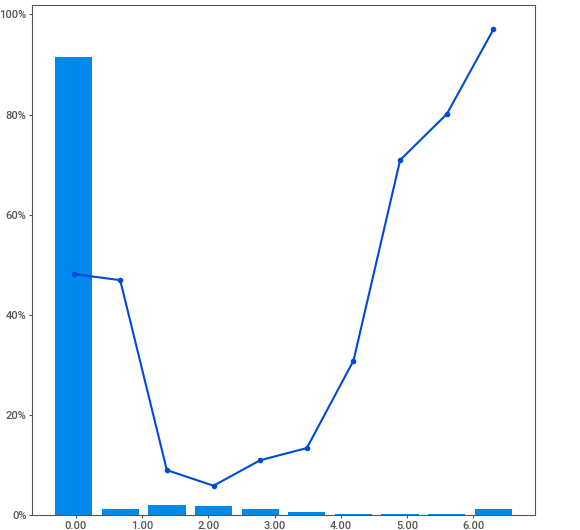
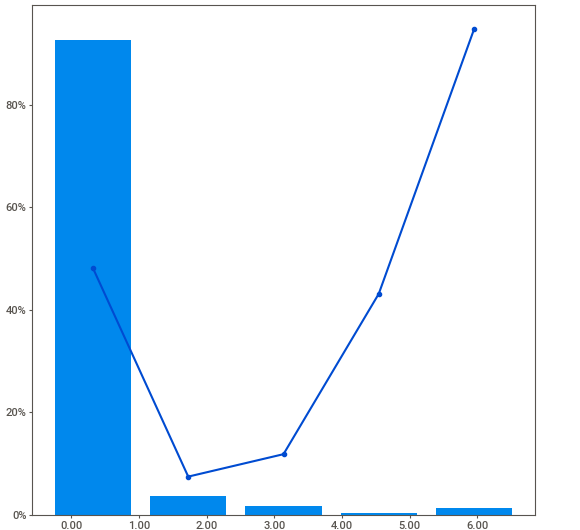
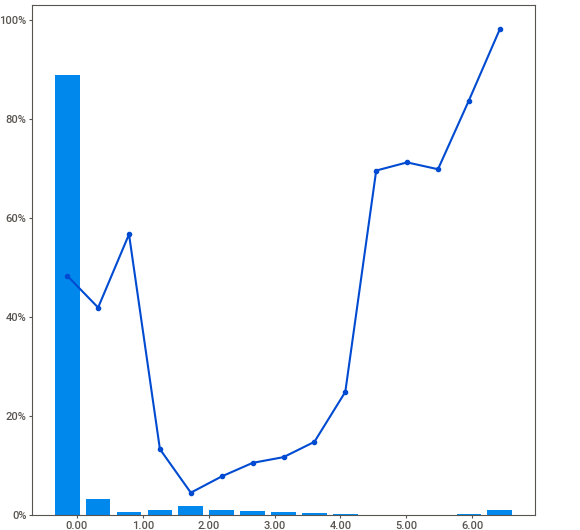
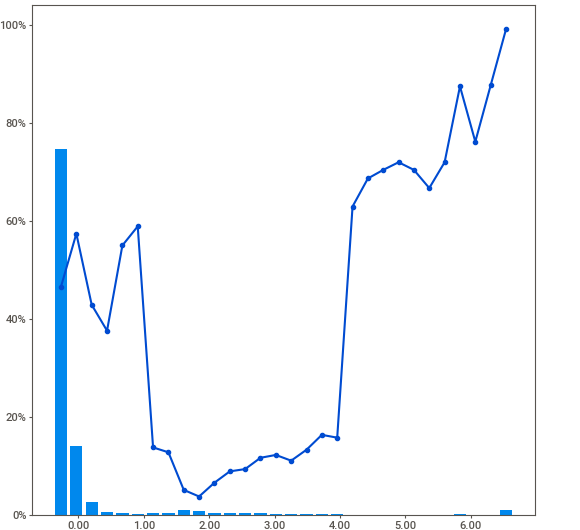
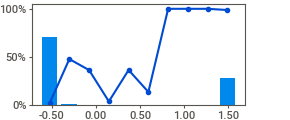
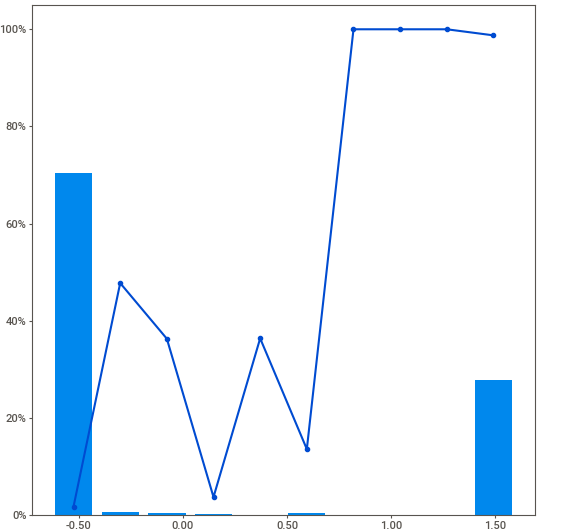
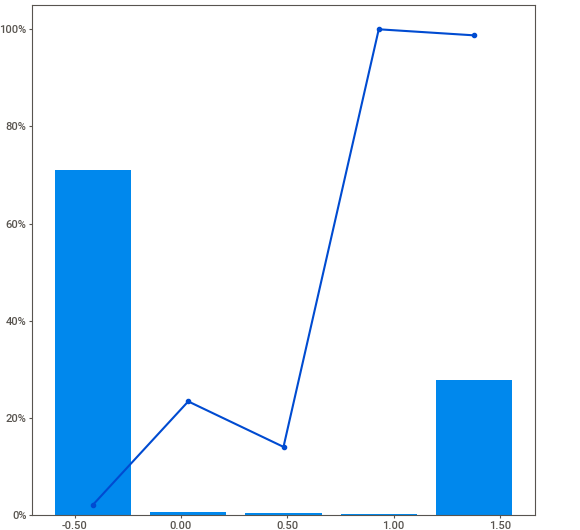
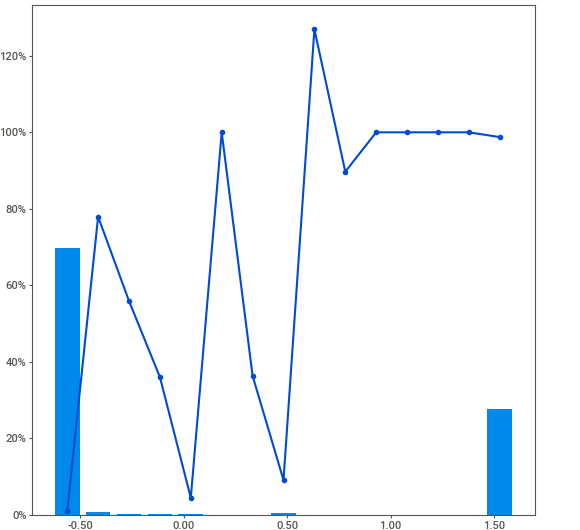
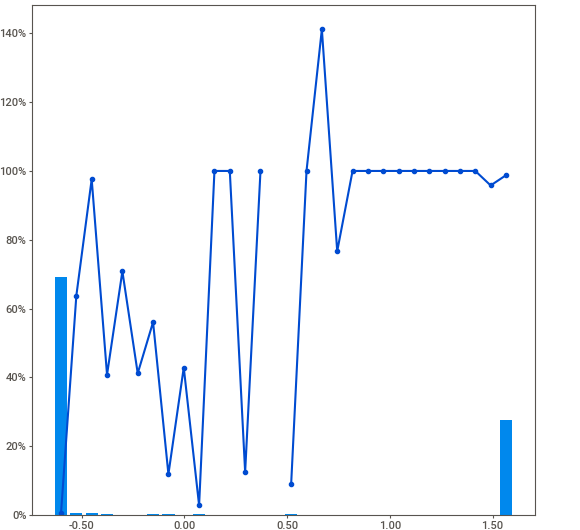
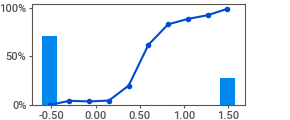
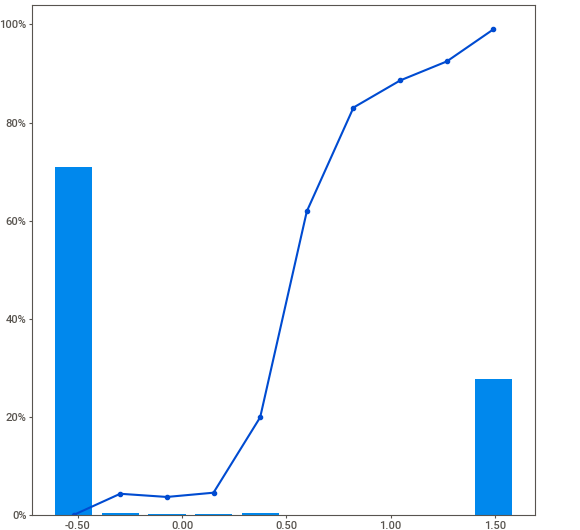
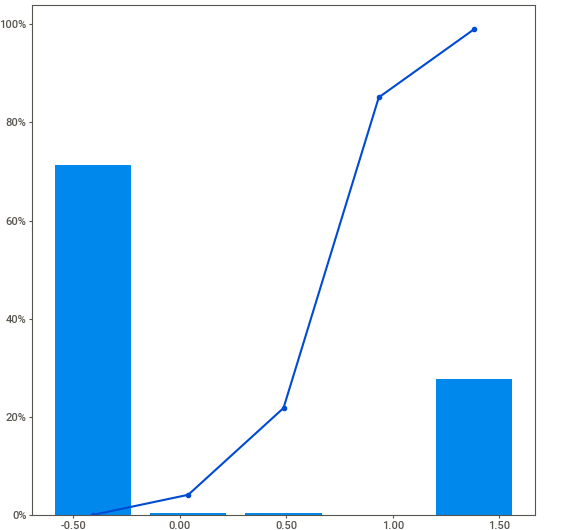
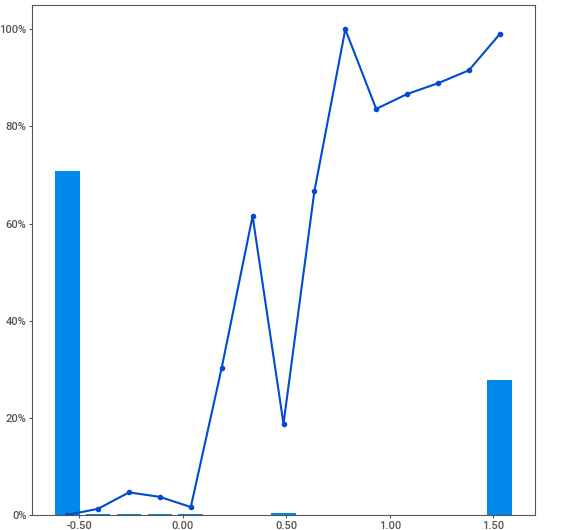
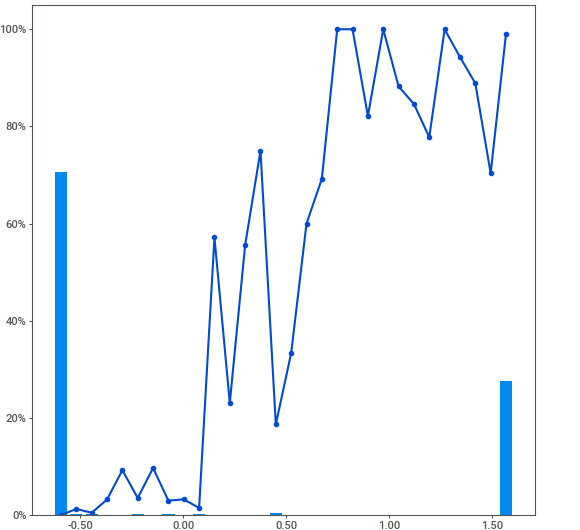
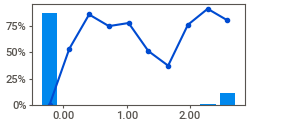
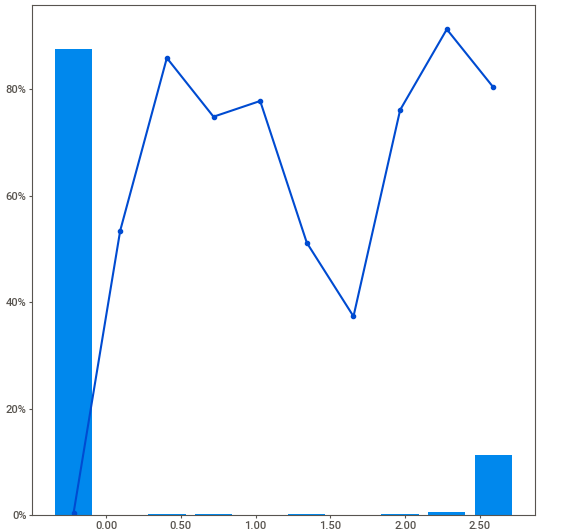
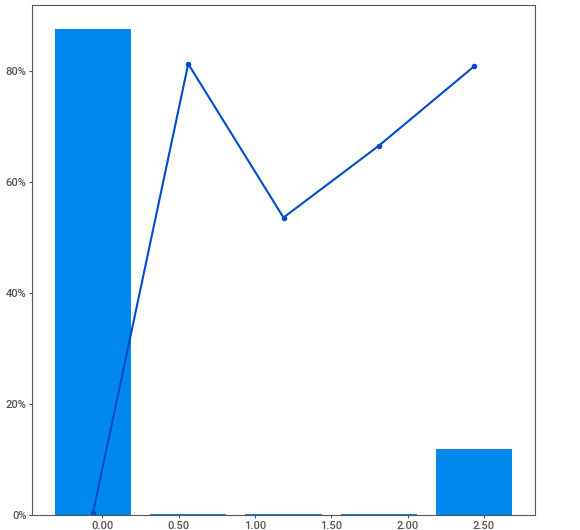
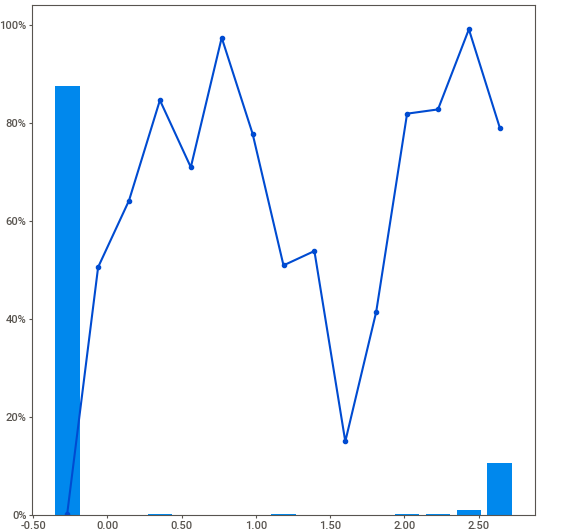
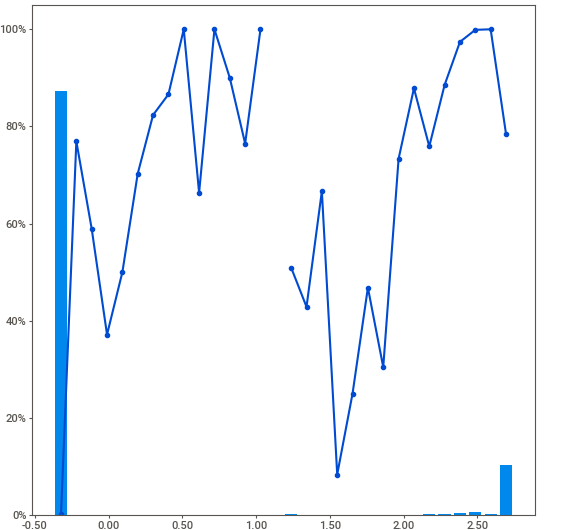
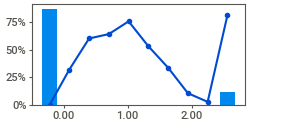
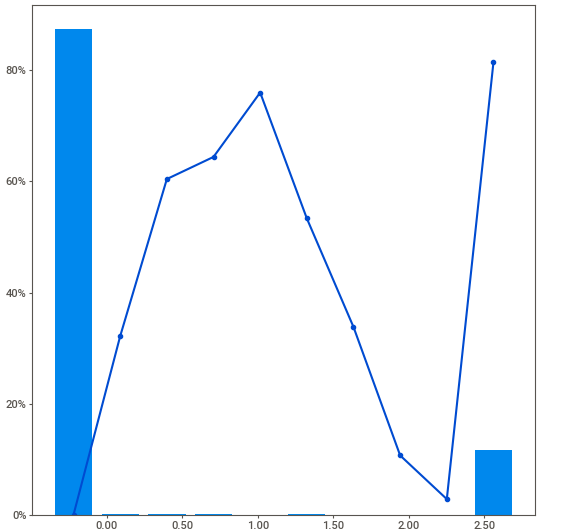
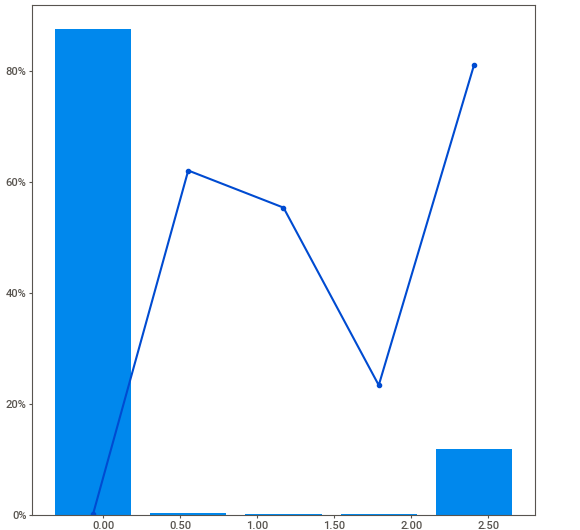
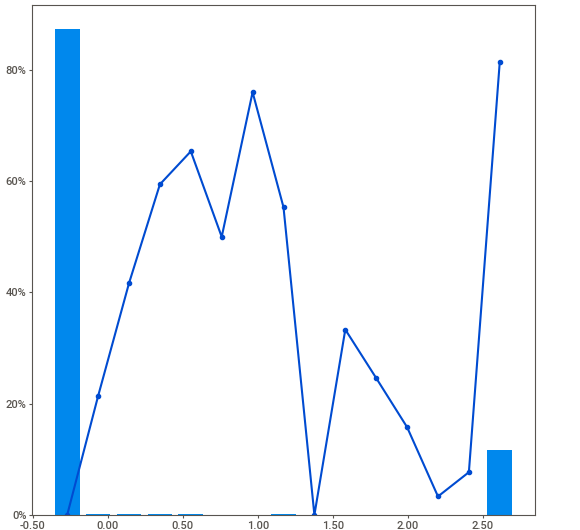
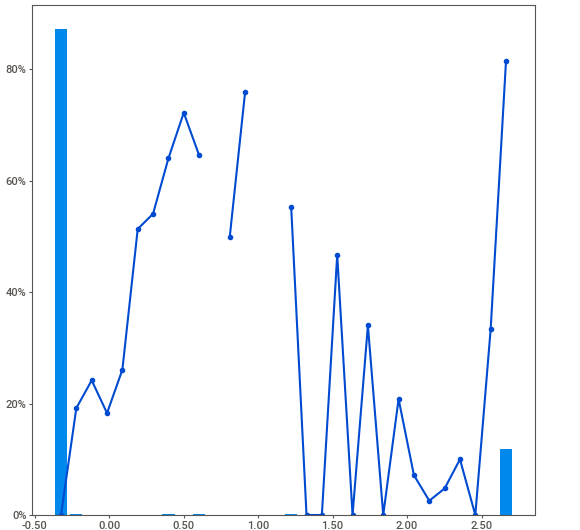
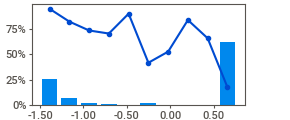
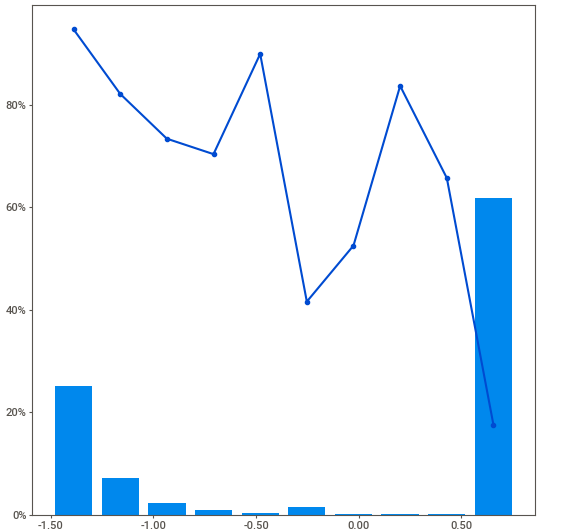
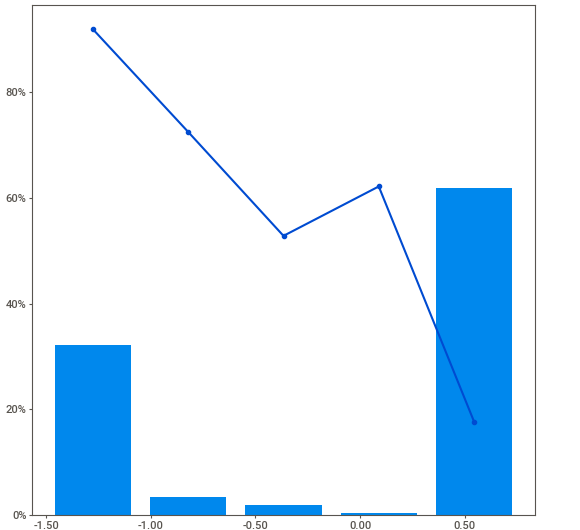
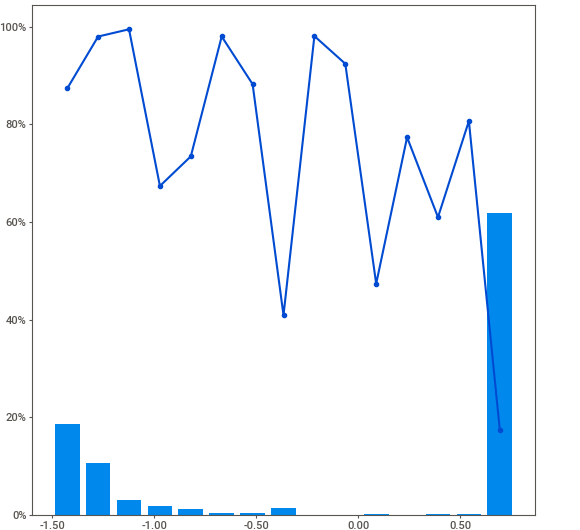
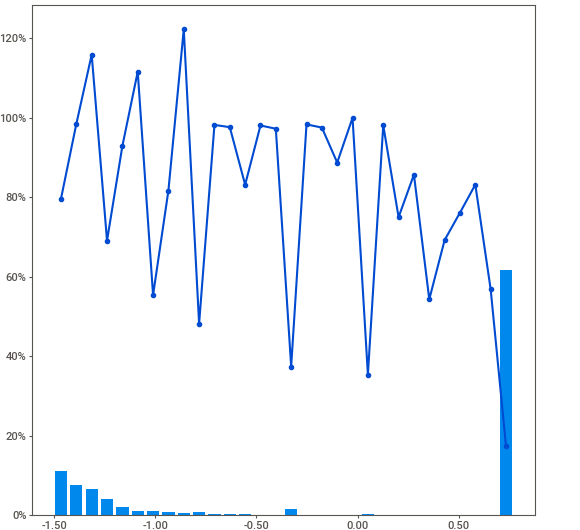
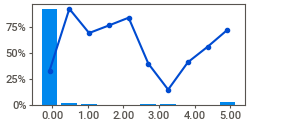
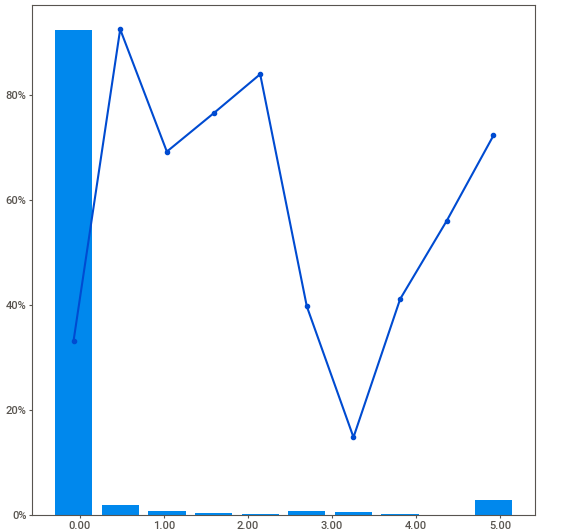
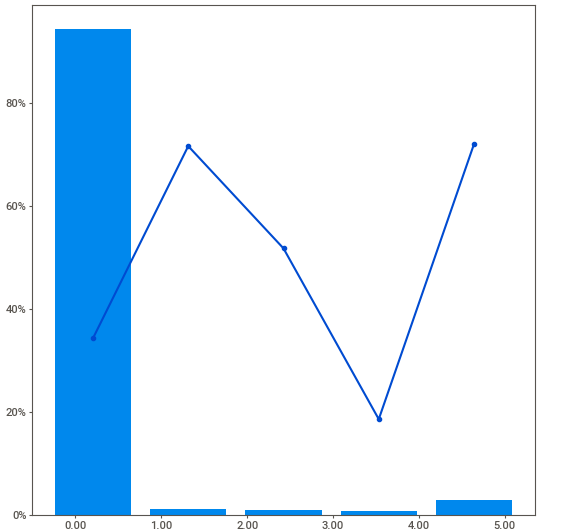
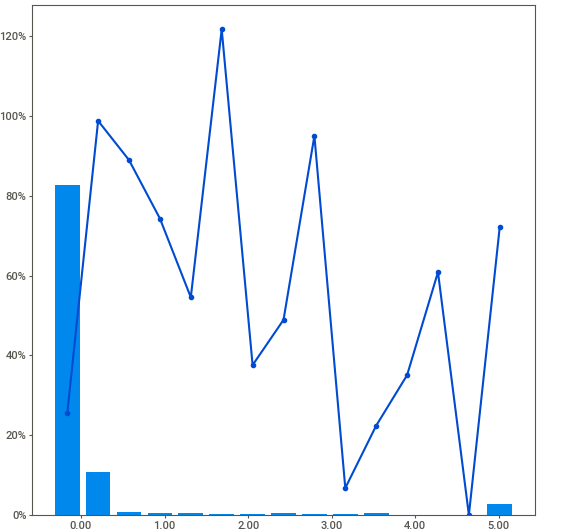
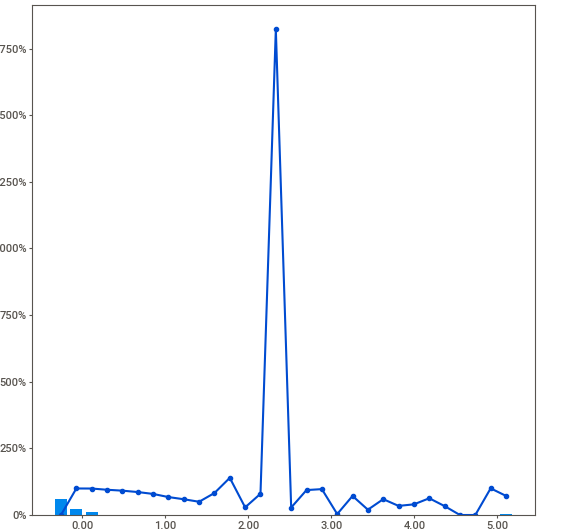
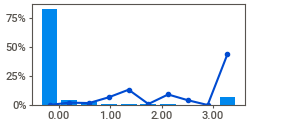
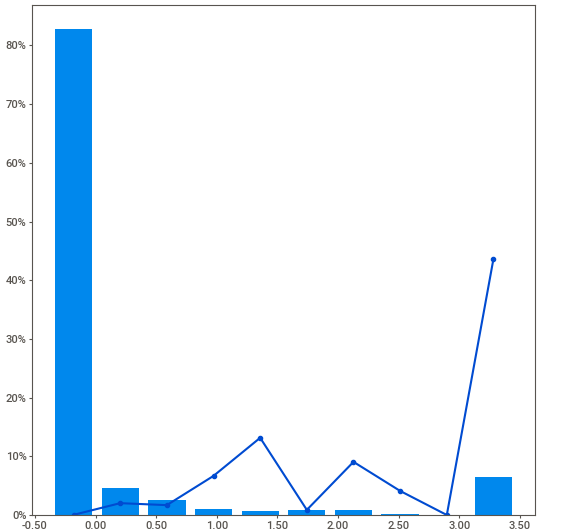
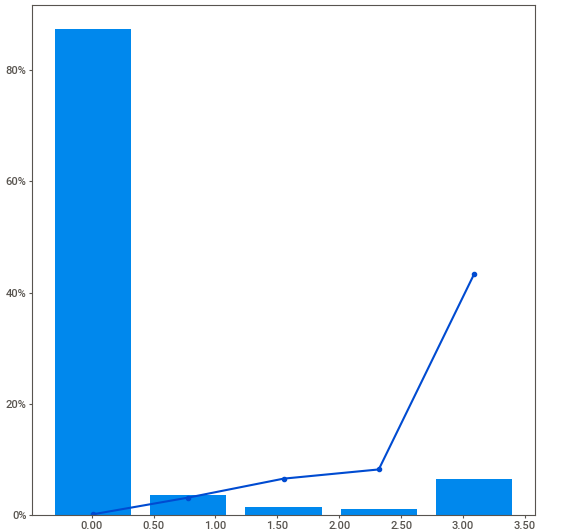
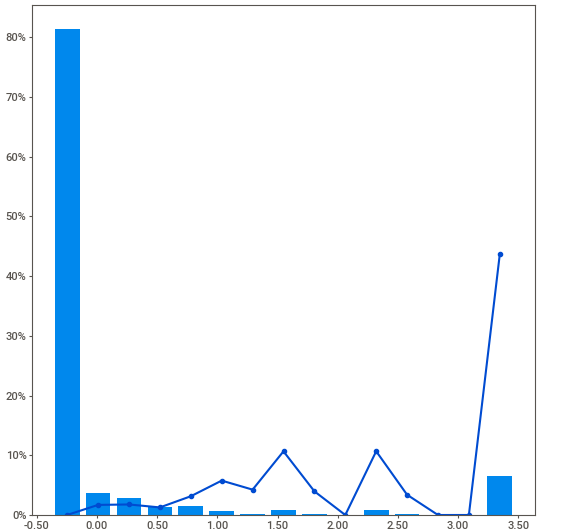
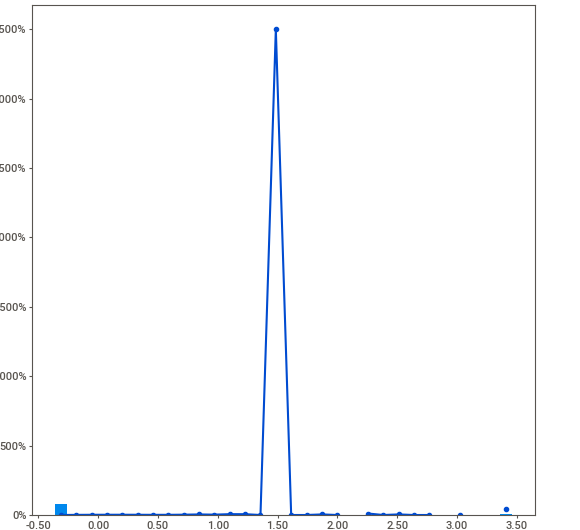
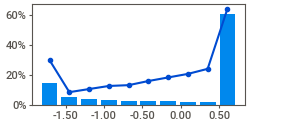
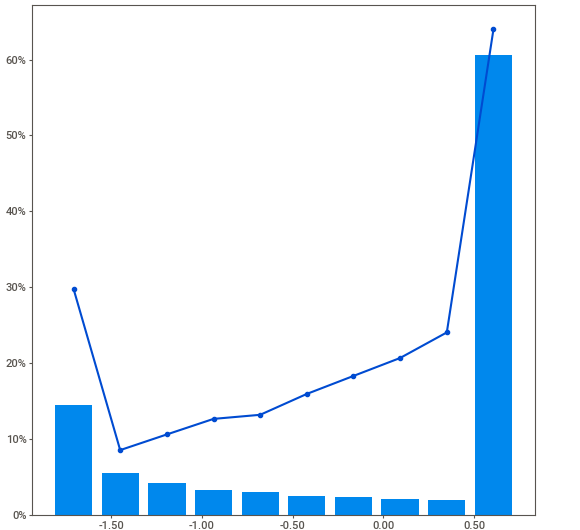
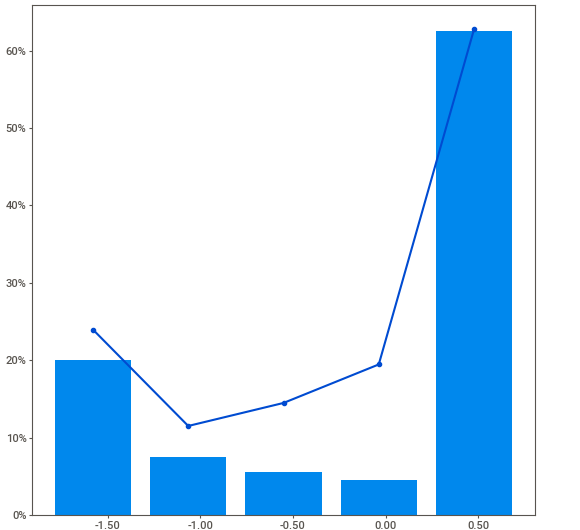
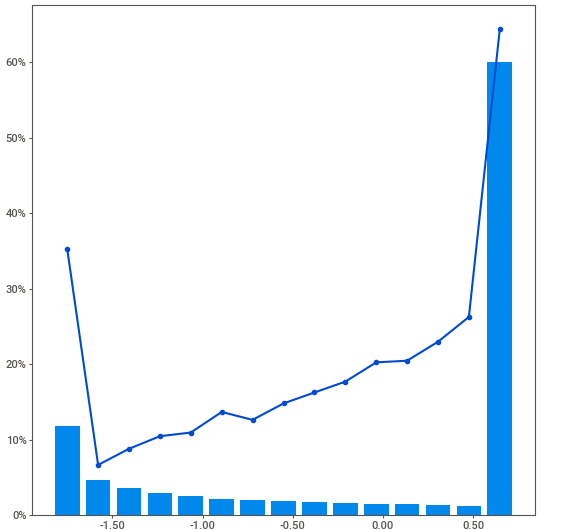
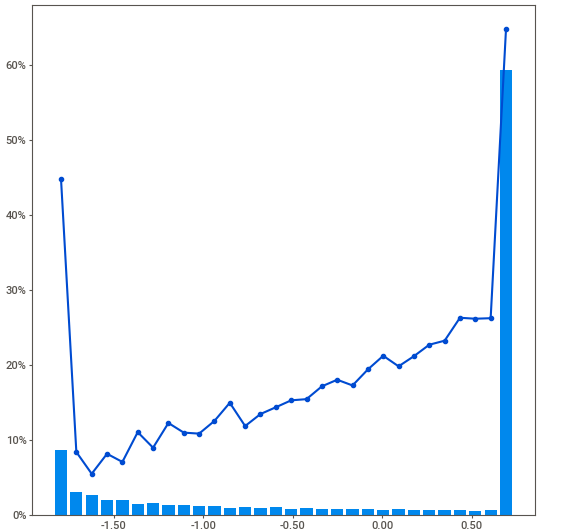
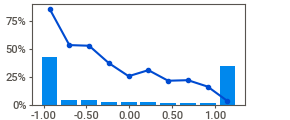
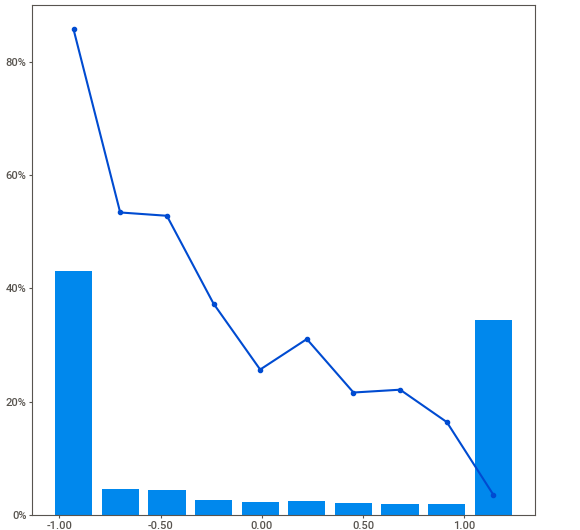
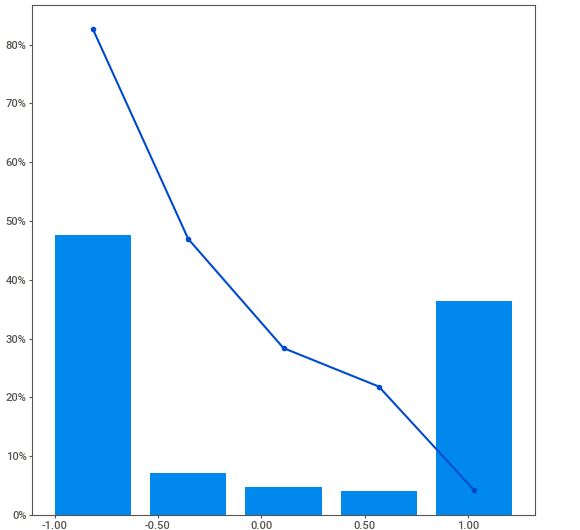
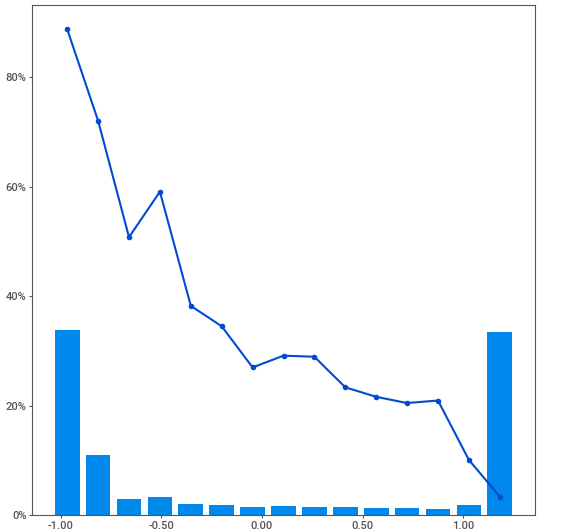
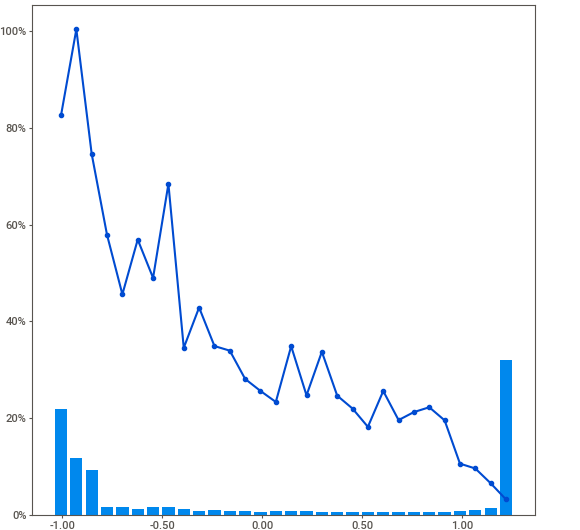
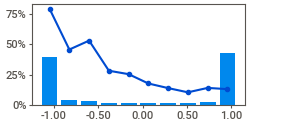
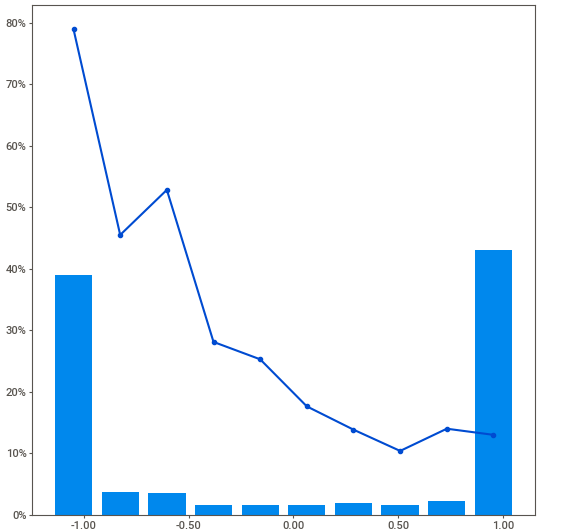
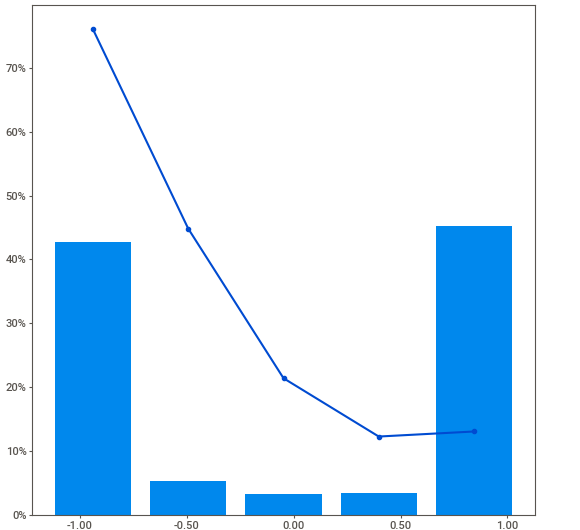
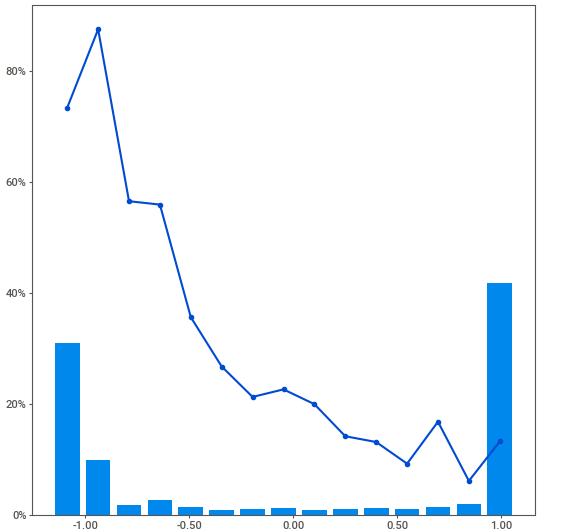
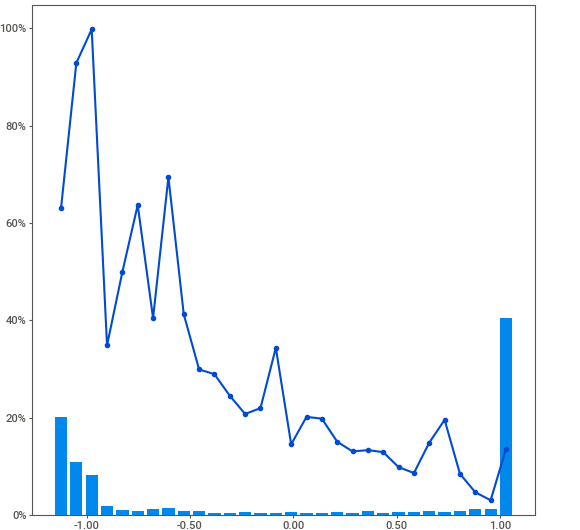
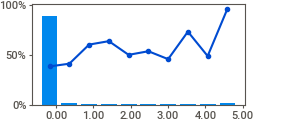
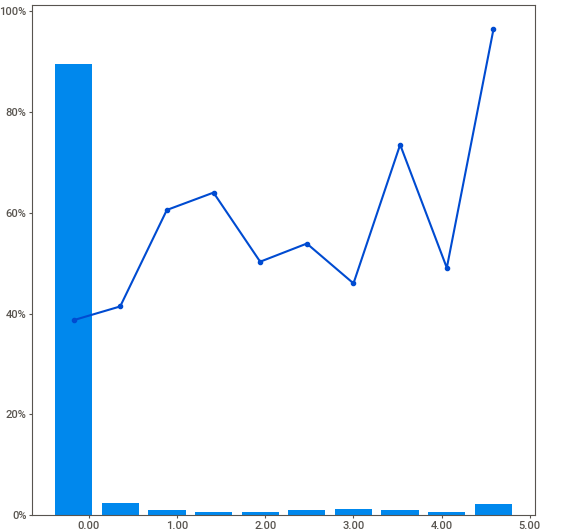
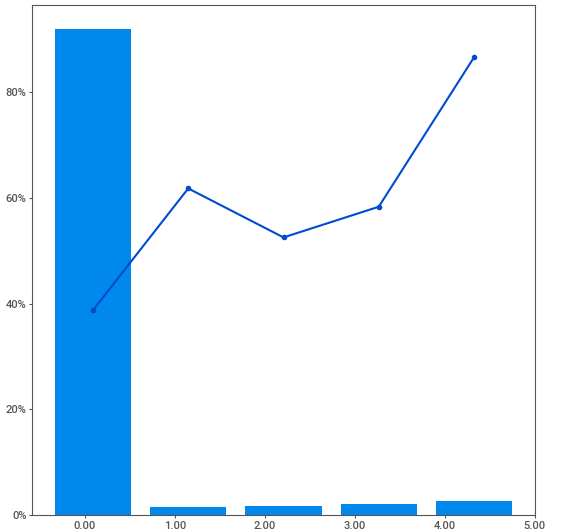
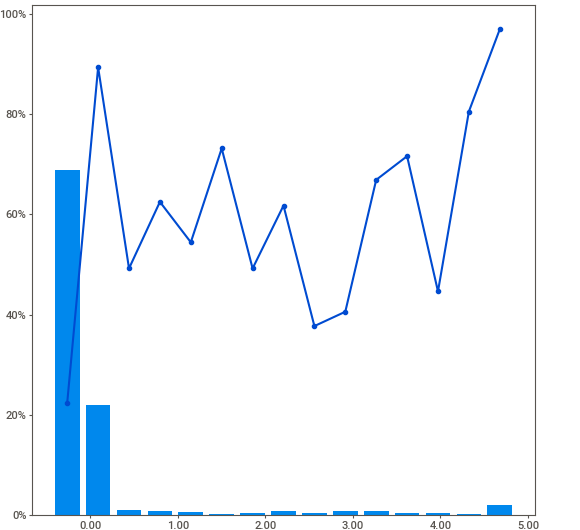
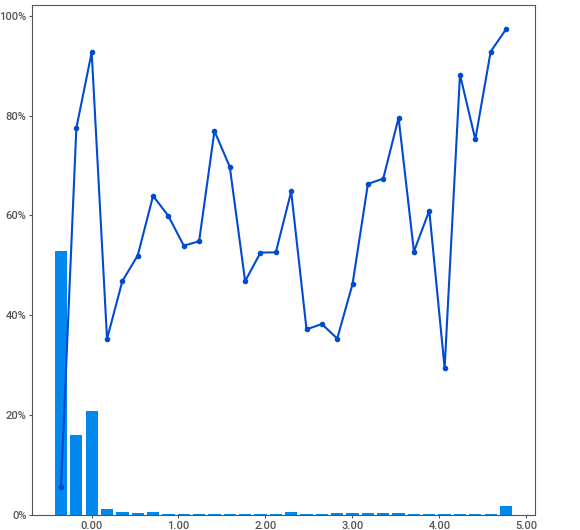
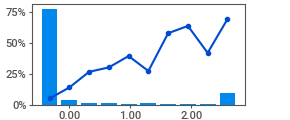
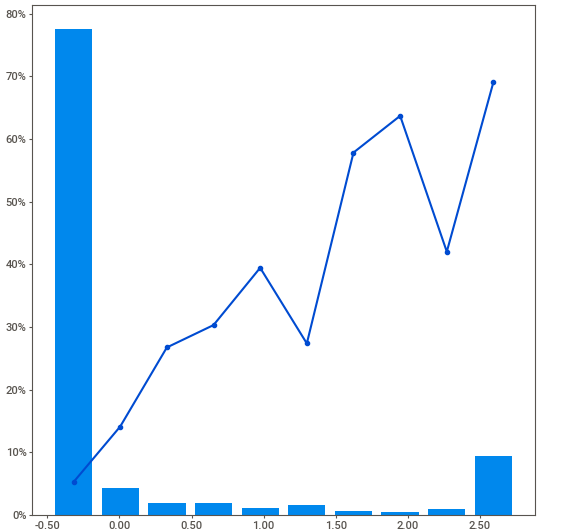
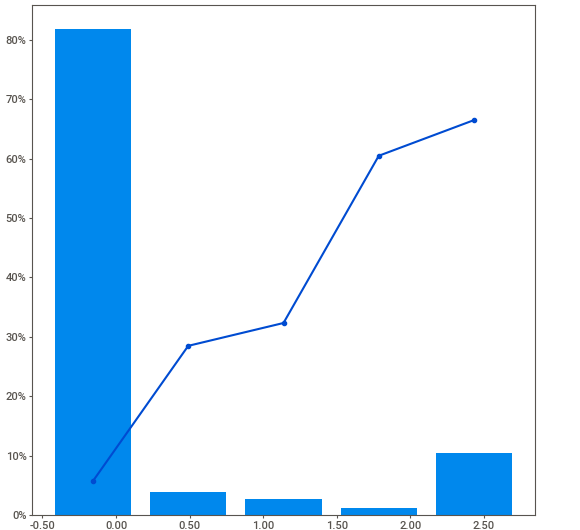
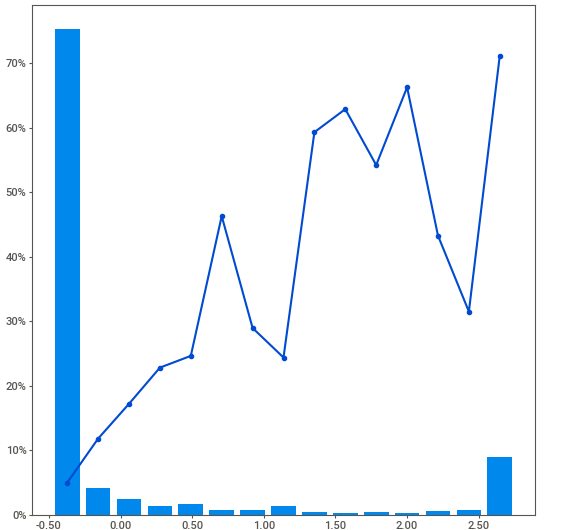
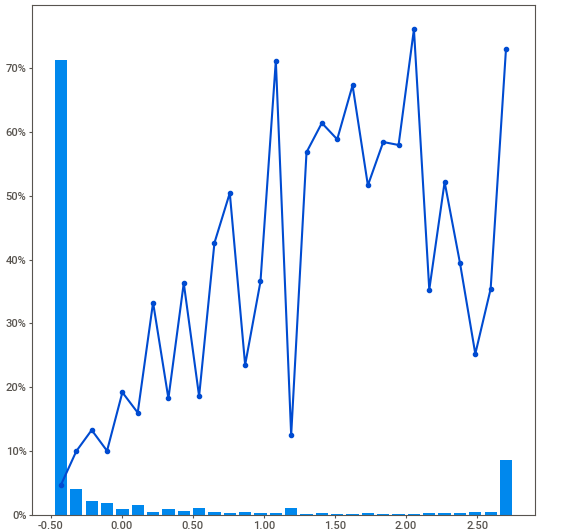
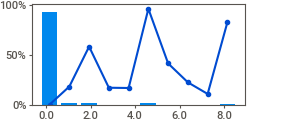
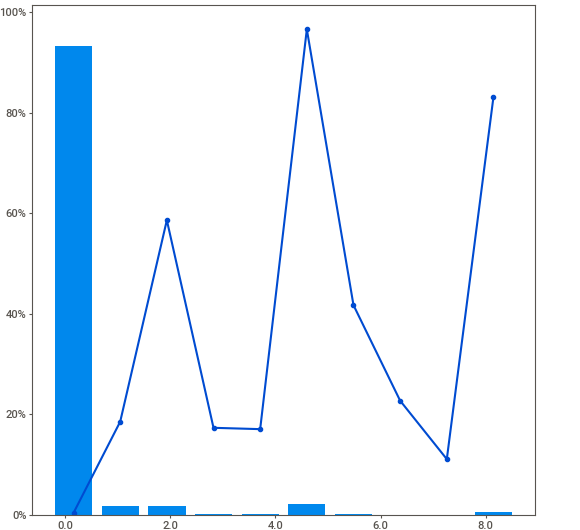
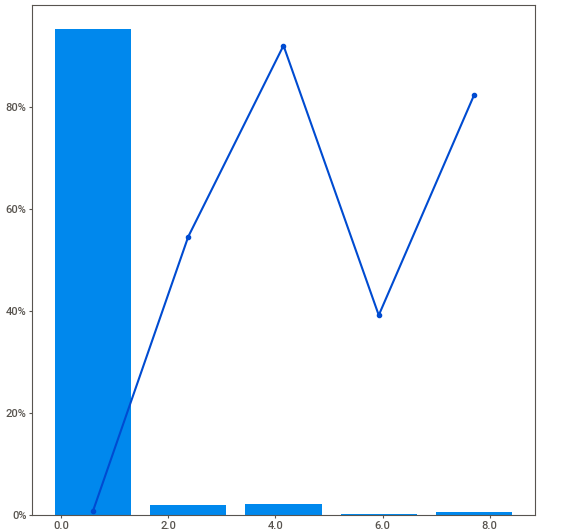
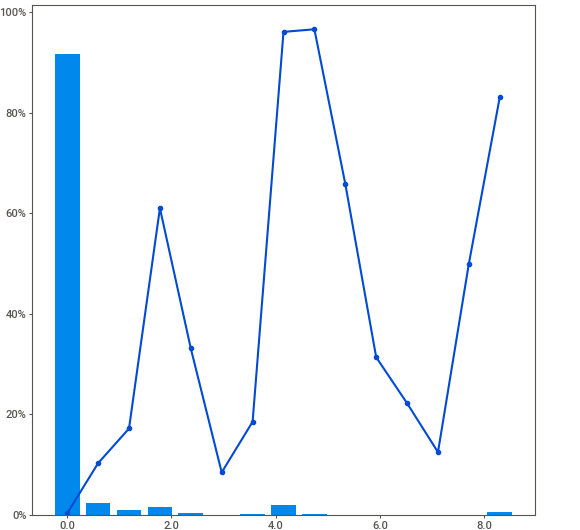
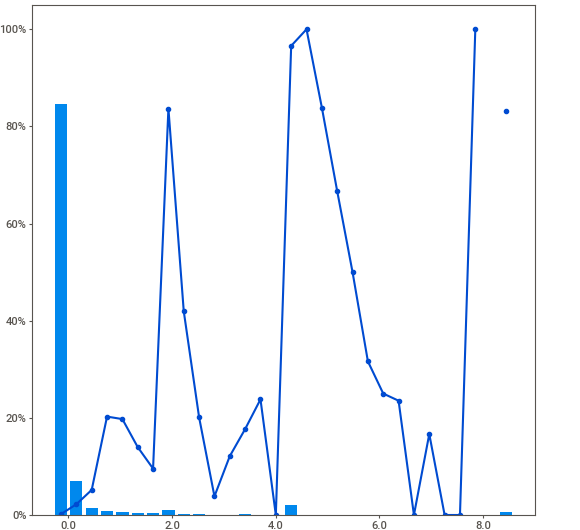
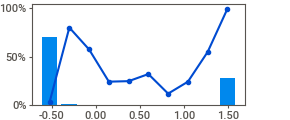
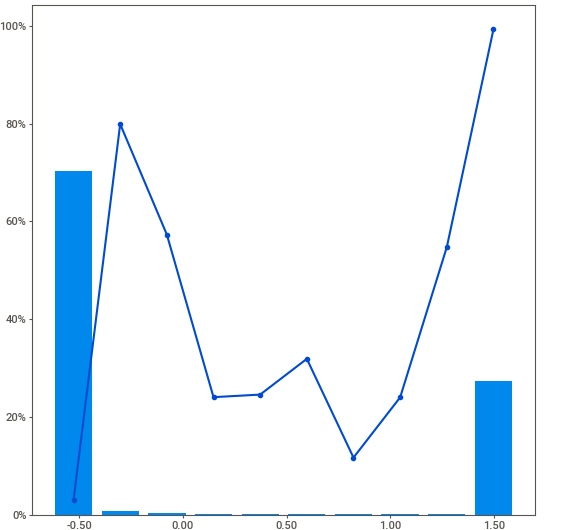
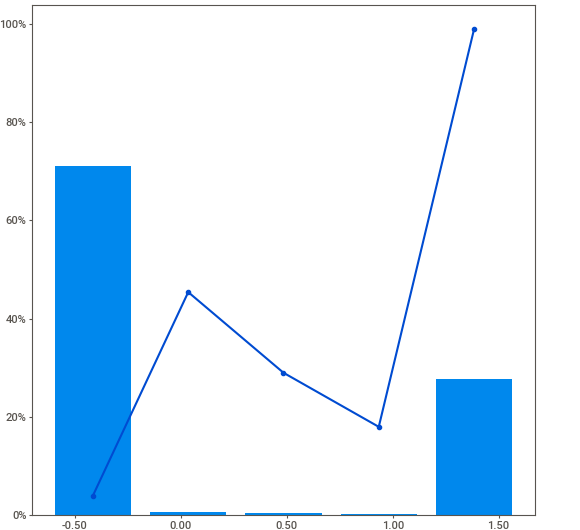
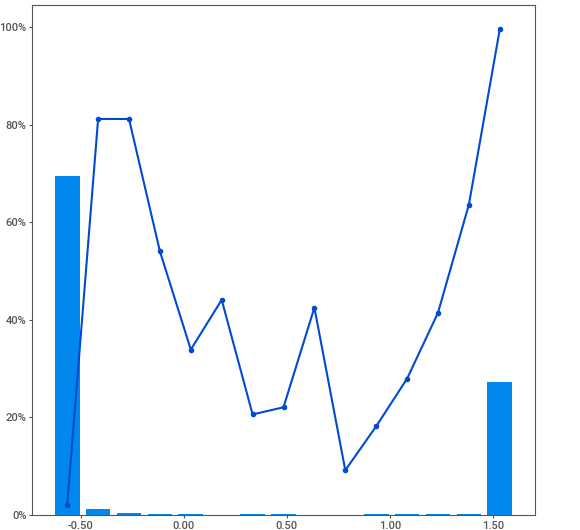
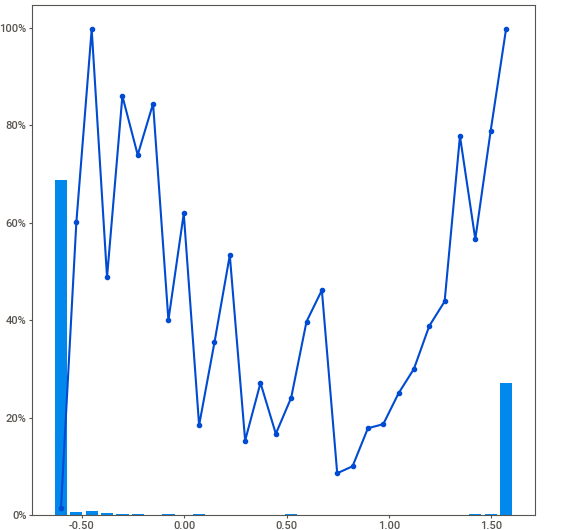
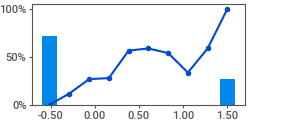
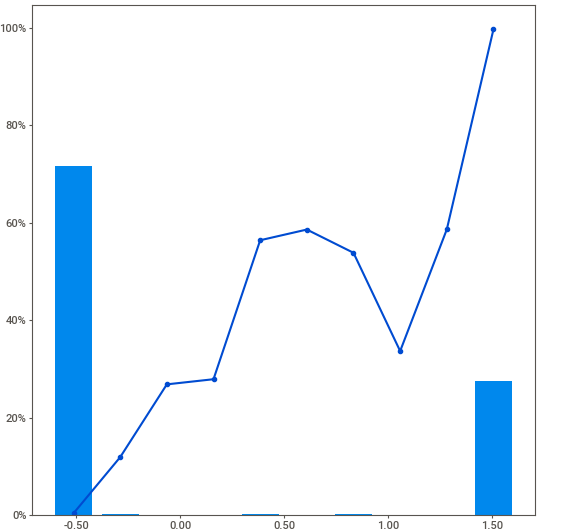
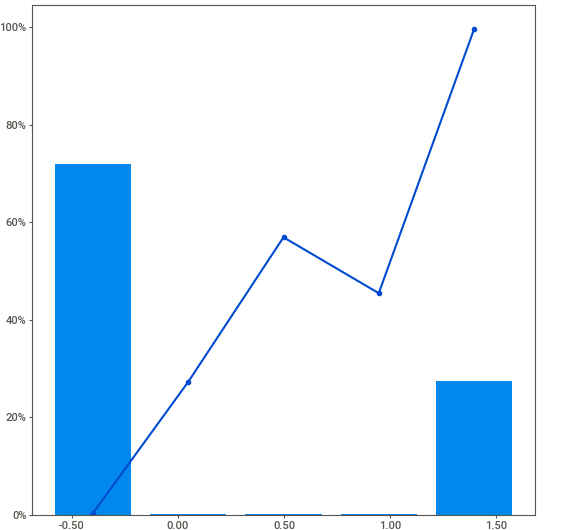
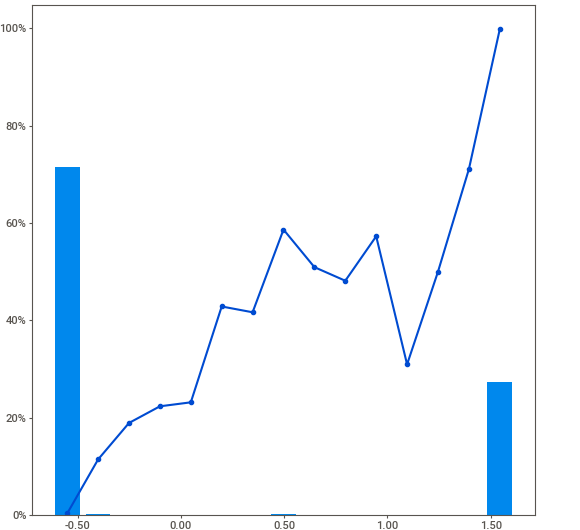
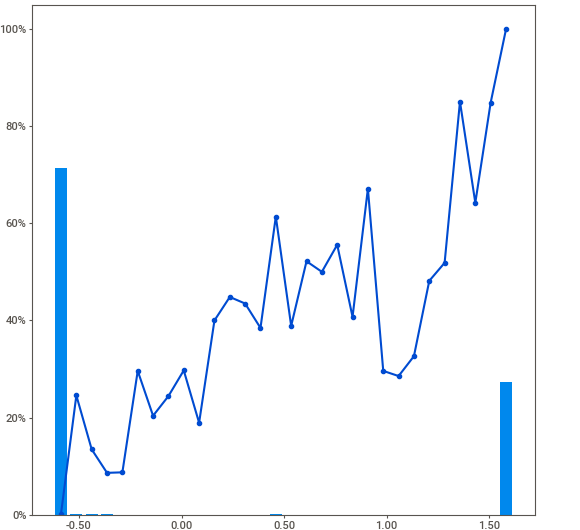
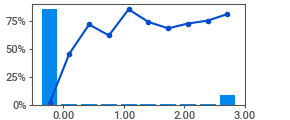
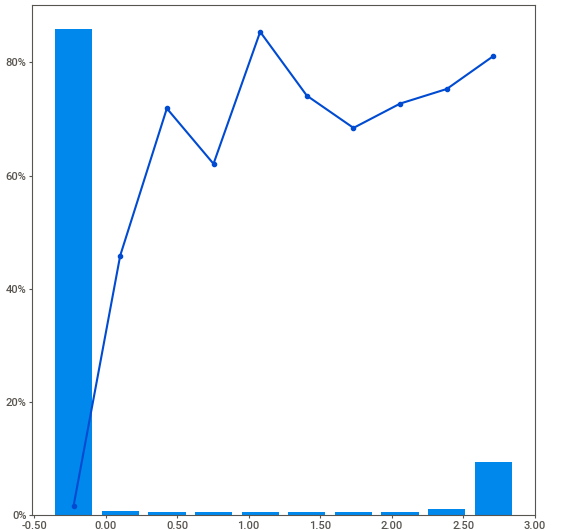
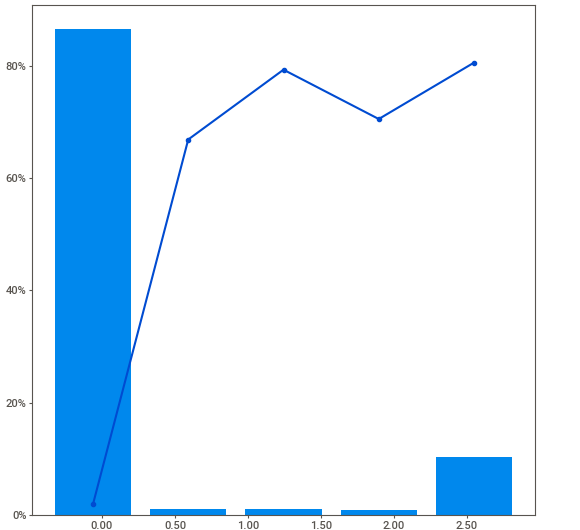
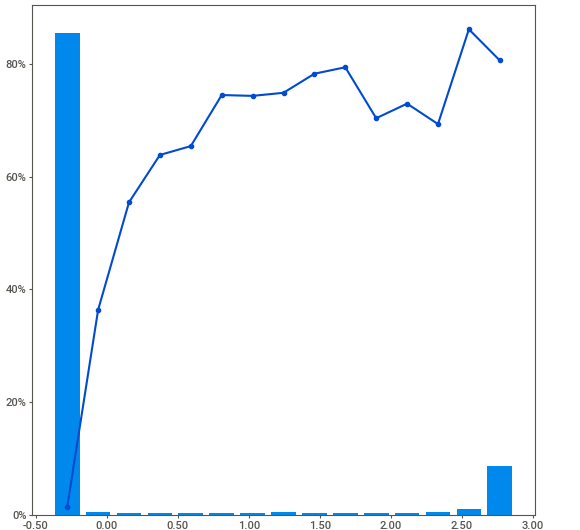
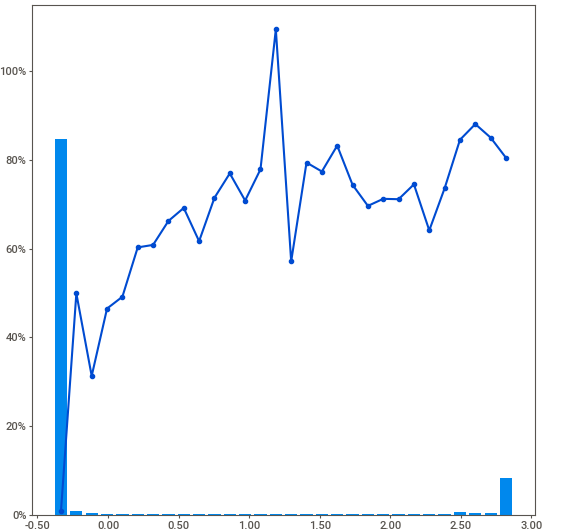
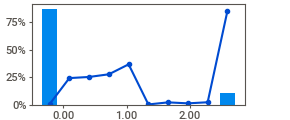
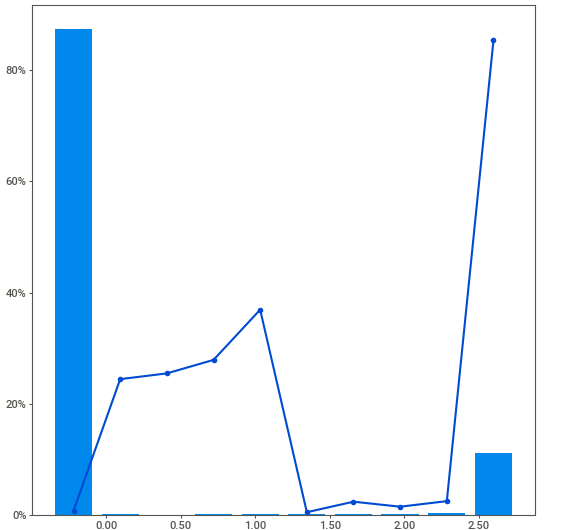
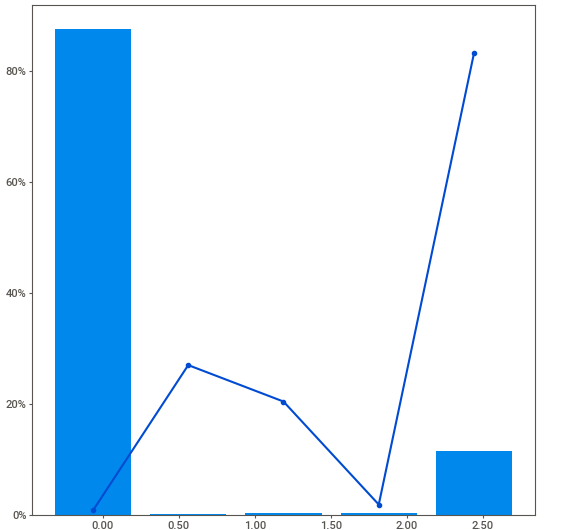
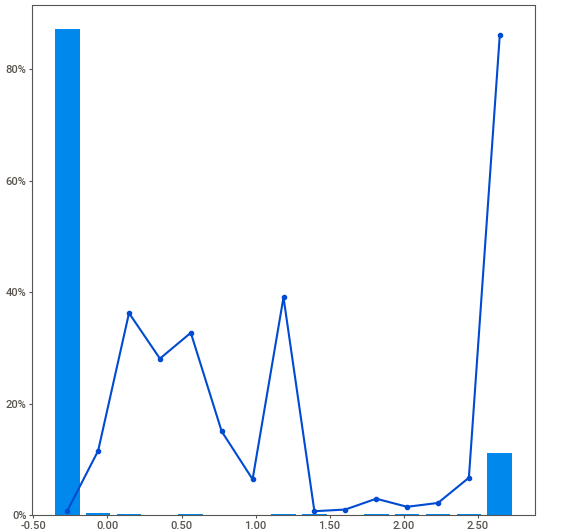
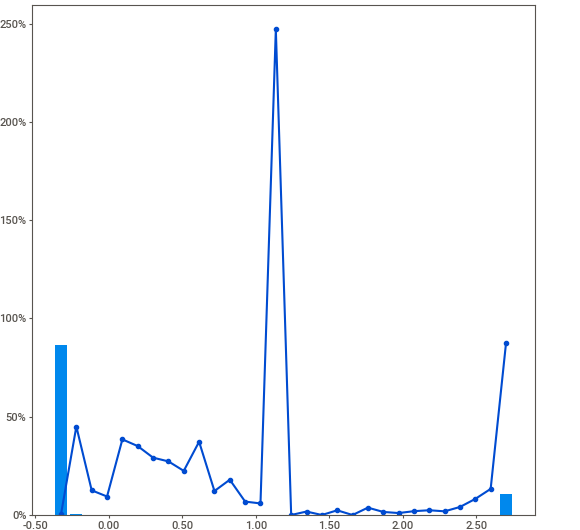
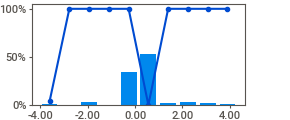
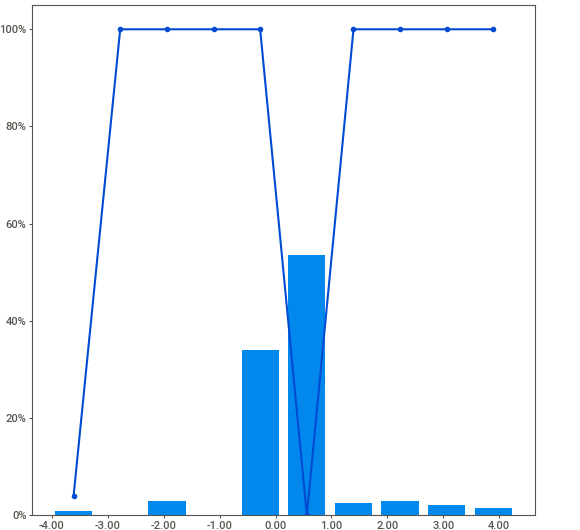
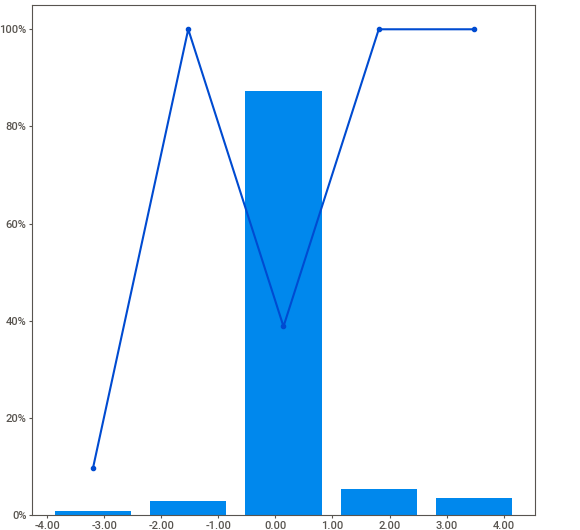
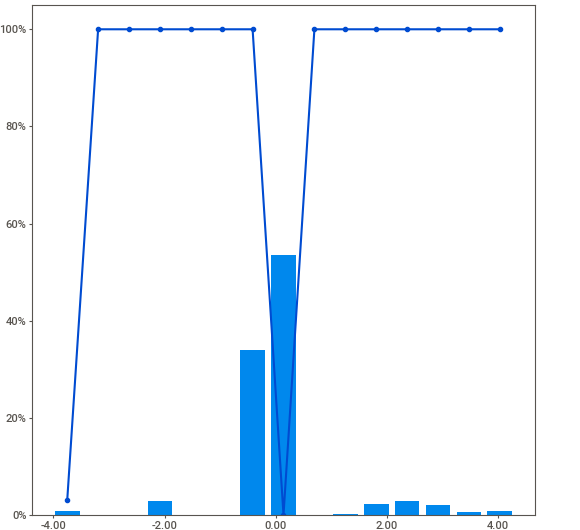
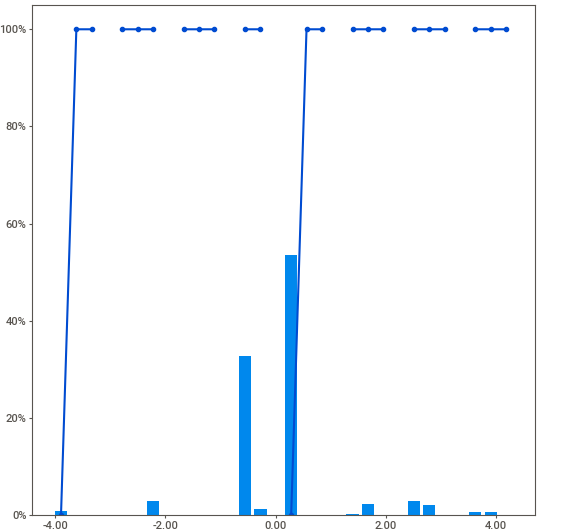
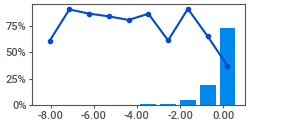
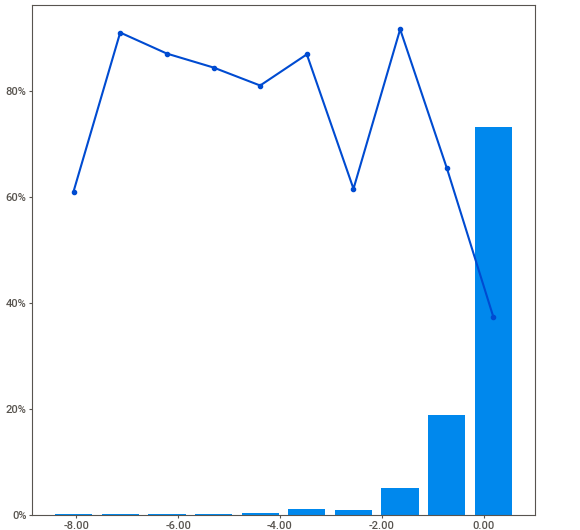
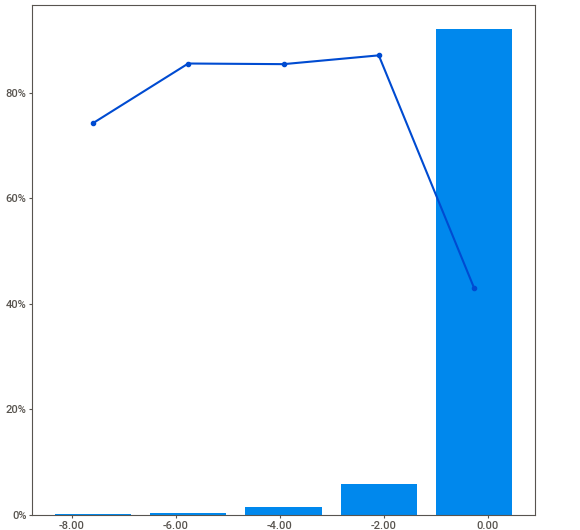
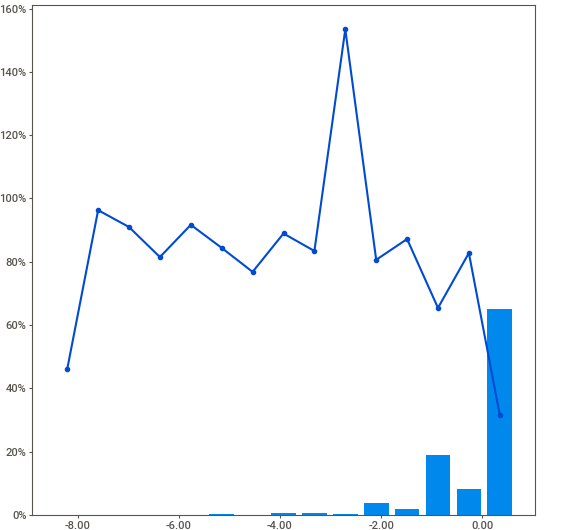
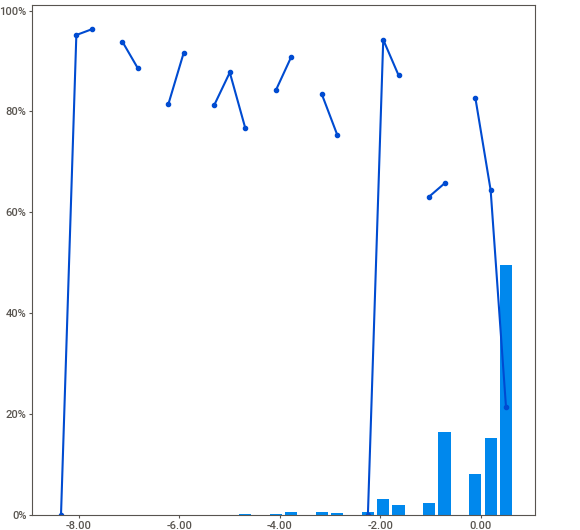
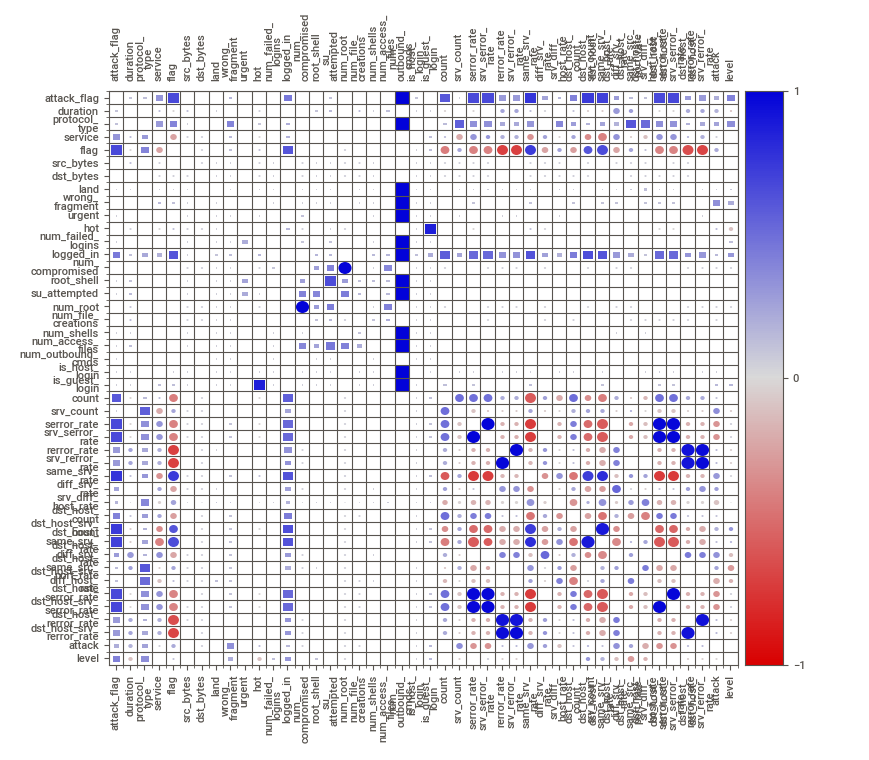
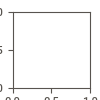

In [34]:
cor_ananlysis.show_notebook()

In [16]:
X_train,Y_train = df_train.drop(['attack_flag'],axis=1),df_train['attack_flag']
X_test,Y_test = df_test.drop(['attack_flag'],axis=1),df_test['attack_flag']